In [1]:
import pandas as pd
from statmanager import Stat_Manager

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'testdata\testdf.csv', index_col = 'id') 
df2 = pd.read_csv(r'testdata\testdf2.csv', index_col = 'id') 

langs = ['kor', 'eng']
dfs = [df, df2]

sm = Stat_Manager(df, language='eng')

Stat_Manager object created successfully! (Version 1.8.1.10)

Method to check how to use: .howtouse()
Method for statistical analysis: .progress()
Method for changing language: .set_language()
Method for changing dataframe .change_dataframe()

*****
↓↓ Check for the more details in documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****



<hr>

In [2]:
sm.progress(method = 'brunner', vars = 'age', group_vars = 'sex')

Brunner-Munzel Test
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,W-value,p-value
dependent variable,,
age,0.02,0.984


In [15]:
result = sm.progress(method = 'kstest', vars = 'income').df_results[0]

Kolmogorov-Smirnov Test


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
all,30.0,0.147,0.494,383.0,-1.0,The normality assumption is met.


In [14]:
import numpy as np
from scipy import stats


compare_dist = (np.mean(df['income']), np.std(df['income']))
result_object = stats.kstest(df['income'], cdf = 'norm', args = compare_dist)
result_object.statistic

0.1465987598520151

In [18]:
np.round(result_object.statistic, 3)

0.147

In [16]:
result['test statistic'].item()

0.147

In [3]:
result_df = pd.DataFrame(columns = ['dependent_variable', 't-value', 'degree of freedom', 'p-value', '95% CI', "Cohen'd"]).set_index('dependent_variable')
result_df

,t-value,degree of freedom,p-value,95% CI,Cohen'd
dependent_variable,,,,,


In [4]:
sm.progress(method = 'ttest_rel', vars = ['prescore', 'postscore'])

Dependent Samples T-test
Variables : prescore, postscore
n = 30
Descriptive analysis: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",1.198,29.0,0.24,"[-0.636, 2.436]",0.313


In [5]:
sm.progress(method = 'ttest_ind', vars = 'age', group_vars = 'sex')

Indenpendent Samples T-test
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,t-value,degree of freedom,p-value,95% CI,Cohen'd
dependent variable,,,,,
age,-0.304,28.0,0.763,"[-5.153, 3.820]",-0.111


# 분석 기능 테스트

In [6]:
sm.progress(method = 'kstest', vars = 'prescore')
sm.progress(method = 'kstest', vars = 'prescore', group_vars = 'sex')
sm.progress(method = 'kstest', vars = 'prescore', group_vars = 'condition')
sm.progress(method = 'kstest', vars = 'prescore', group_vars = ['condition', 'sex'])

Kolmogorov-Smirnov Test


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
all,30.0,0.143,0.521,3.0,1.0,The normality assumption is met.


Kolmogorov-Smirnov Test


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
female,15.0,0.179,0.656,8.0,-1.0,The normality assumption is met.
male,15.0,0.172,0.706,4.0,1.0,The normality assumption is met.


Kolmogorov-Smirnov Test


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
test_group,10.0,0.152,0.948,2.0,1.0,The normality assumption is met.
sham_group,10.0,0.127,0.990,7.0,1.0,The normality assumption is met.
control_group,10.0,0.223,0.624,8.0,-1.0,The normality assumption is met.


Kolmogorov-Smirnov Test


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
test_group & female,5.0,0.316,0.600,7.0,-1.0,The normality assumption is met.
test_group & male,5.0,0.268,0.787,0.0,1.0,The normality assumption is met.
sham_group & female,5.0,0.332,0.538,6.0,1.0,The normality assumption is met.
sham_group & male,5.0,0.285,0.722,7.0,-1.0,The normality assumption is met.
control_group & female,5.0,0.318,0.594,3.0,1.0,The normality assumption is met.
control_group & male,5.0,0.210,0.945,8.0,-1.0,The normality assumption is met.


In [7]:
sm.progress(method = 'shapiro', vars = 'age')
sm.progress(method = 'shapiro', vars = 'age', group_vars = 'sex')
sm.progress(method = 'shapiro', vars = 'age', group_vars = 'condition')
sm.progress(method = 'shapiro', vars = 'age', group_vars = ['sex','condition'])

Shapiro-Wilks Test


,n,test statistic,p-value,conclusion
set,,,,
all,30.0,0.903,0.01,The normality assumption is not met.


Shapiro-Wilks Test


,n,test statistic,p-value,conclusion
set,,,,
female,15.0,0.932,0.292,The normality assumption is met.
male,15.0,0.876,0.042,The normality assumption is not met.


Shapiro-Wilks Test


,n,test statistic,p-value,conclusion
set,,,,
test_group,10.0,0.894,0.187,The normality assumption is met.
sham_group,10.0,0.910,0.280,The normality assumption is met.
control_group,10.0,0.877,0.122,The normality assumption is met.


Shapiro-Wilks Test


,n,test statistic,p-value,conclusion
set,,,,
female & test_group,5.0,0.980,0.937,The normality assumption is met.
female & sham_group,5.0,0.947,0.717,The normality assumption is met.
female & control_group,5.0,0.912,0.479,The normality assumption is met.
male & test_group,5.0,0.835,0.152,The normality assumption is met.
male & sham_group,5.0,0.883,0.321,The normality assumption is met.
male & control_group,5.0,0.823,0.123,The normality assumption is met.


z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
all,30.0,0.736,0.427,1.724,-0.4,0.833,-0.48,1.96,The normality assumption is met.



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.
z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
female,15.0,0.958,0.58,1.652,0.895,1.121,0.799,1.96,The normality assumption is met.
male,15.0,0.594,0.58,1.023,-1.021,1.121,-0.910,1.96,The normality assumption is met.



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.
z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
test_group,10.0,0.727,0.687,1.058,-0.735,1.334,-0.551,1.96,The normality assumption is met.
sham_group,10.0,0.532,0.687,0.775,-0.011,1.334,-0.008,1.96,The normality assumption is met.
control_group,10.0,1.261,0.687,1.835,1.537,1.334,1.152,1.96,The normality assumption is met.



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.
z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
female & test_group,5.0,0.418,0.913,0.457,0.966,2.0,0.483,1.96,The normality assumption is met.
female & sham_group,5.0,0.892,0.913,0.977,1.530,2.0,0.765,1.96,The normality assumption is met.
female & control_group,5.0,1.278,0.913,1.400,1.876,2.0,0.938,1.96,The normality assumption is met.
male & test_group,5.0,0.198,0.913,0.217,-3.003,2.0,-1.502,1.96,The normality assumption is met.
male & sham_group,5.0,-0.016,0.913,-0.018,-2.096,2.0,-1.048,1.96,The normality assumption is met.
male & control_group,5.0,1.446,0.913,1.584,2.278,2.0,1.139,1.96,The normality assumption is met.



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.


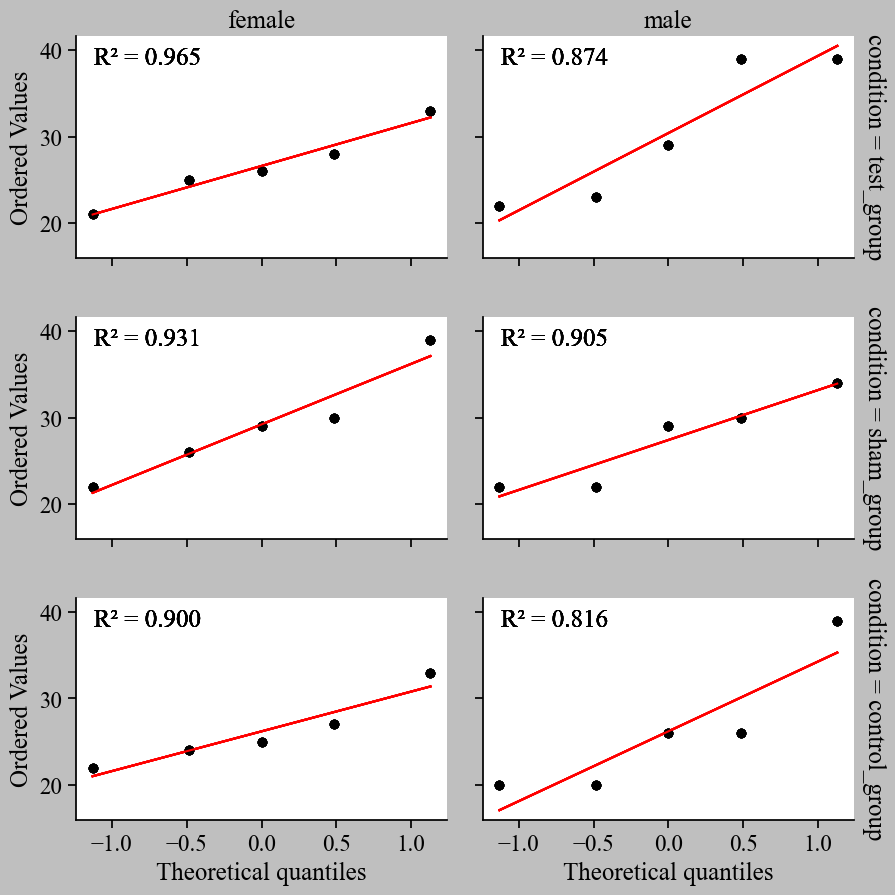

In [8]:
sm.progress(method = 'z_normal', vars = 'age')
sm.progress(method = 'z_normal', vars = 'age', group_vars = 'sex')
sm.progress(method = 'z_normal', vars = 'age', group_vars = 'condition')
sm.progress(method = 'z_normal', vars = 'age', group_vars = ['sex','condition']).figure()

In [9]:
sm.progress(method = 'levene', vars = 'age', group_vars = 'sex')#.figure()
sm.progress(method = 'levene', vars = 'age', group_vars = 'condition')#.figure()
sm.progress(method = 'levene', vars = 'age', group_vars = ['sex', 'condition', 'location'])

Group variable : sex
Comparison groups : ['female' 'male']
Test statistics = 1.957, p = 0.173

Conclusion : The homoskedasticity assumption is met
Group variable : condition
Comparison groups : ['test_group' 'sham_group' 'control_group']
Test statistics = 0.237, p = 0.791

Conclusion : The homoskedasticity assumption is met
Group variable : ['sex', 'condition', 'location']
Comparison groups : ['female & test_group & kor', 'female & test_group & usa', 'female & sham_group & kor', 'female & sham_group & usa', 'female & control_group & kor', 'female & control_group & usa', 'male & test_group & kor', 'male & test_group & usa', 'male & test_group & jpn', 'male & sham_group & kor', 'male & sham_group & usa', 'male & sham_group & jpn', 'male & control_group & kor', 'male & control_group & usa', 'male & control_group & jpn']
Test statistics = 0.369, p = 0.965

Conclusion : The homoskedasticity assumption is met


F-max Test
Variable: age
Group variable : sex
No. of groups = 2
Included groups : ['female' 'male']

Max variance among groups = 48.143
Min variance among groups = 23.810
F-max statistic = 2.022

Conclusion : The homoskedasticity assumption is met

Reference:
[1] Fidell, L. S., & Tabachnick, B. G. (2003). Preparatory data analysis. Handbook of psychology: Research methods in psychology, 2, 115-141.

F-max Test
Variable: age
Group variable : condition
No. of groups = 3
Included groups : ['test_group' 'sham_group' 'control_group']

Max variance among groups = 43.167
Min variance among groups = 30.900
F-max statistic = 1.397

Conclusion : The homoskedasticity assumption is met

Reference:
[1] Fidell, L. S., & Tabachnick, B. G. (2003). Preparatory data analysis. Handbook of psychology: Research methods in psychology, 2, 115-141.

F-max Test
Variable: age
Group variable : ['sex', 'condition']
No. of groups = 6
Included groups : ['female & test_group', 'female & sham_group', 'female & contro

<Axes: title={'center': 'Variance of age by sex, condition'}, xlabel='sex & condition', ylabel='age'>

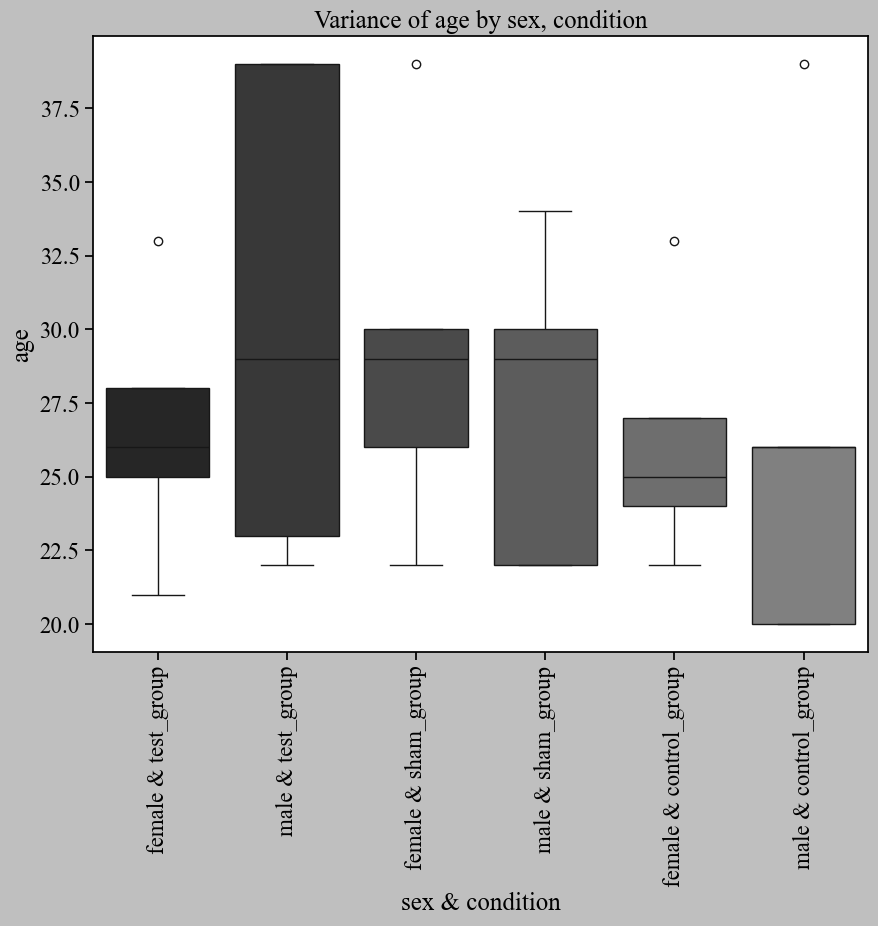

In [10]:
sm.progress(method = 'fmax', vars = 'age', group_vars = 'sex')
sm.progress(method = 'fmax', vars = 'age', group_vars = 'condition')
sm.progress(method = 'fmax', vars = 'age', group_vars = ['sex','condition']).figure()

In [11]:
sm.progress(method = 'chi2_contingency', vars = ['sex', 'condition'])

Chi-Squared Test
Variables : sex, condition

χ² = 0.000, p = 1.000, degree of freedom = 2
Contingency Table: 


,control_group,sham_group,test_group
sex,,,
female,5,5,5
male,5,5,5


Expected frequency contingency table: 
Percentage of cells with expected frequency less than 5 = 0.00%



,control_group,sham_group,test_group
sex,,,
female,5.0,5.0,5.0
male,5.0,5.0,5.0


In [12]:
sm.progress(method = 'kruskal', vars = 'prescore', group_vars = ['condition'])

Kruskal-Wallis Test
Variable : prescore
Group variable : condition
Comparison group : ['test_group' 'sham_group' 'control_group']
Decriptive analysis: 


,control_group,sham_group,test_group
n,10.000,10.000,10.000
mean,5.400,6.000,4.000
median,5.000,6.000,3.500
std,2.951,2.357,3.091
min,1.000,3.000,0.000
max,9.000,10.000,8.000


,H-value,degree of freedom,p-value
dependent variable,,,
prescore,2.44,2.0,0.295


In [13]:
sm.progress(method = 'ttest_rel', vars = ['prescore', 'postscore'])

Dependent Samples T-test
Variables : prescore, postscore
n = 30
Descriptive analysis: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",1.198,29.0,0.24,"[-0.636, 2.436]",0.313


In [14]:
sm.progress(method = 'ttest_ind_trim0.05', vars = 'prescore', group_vars = 'sex')

Yuen's Two-Sample T-test (Independent samples t-test using unequal variance)
Note: The analysis will trim the top and bottom 5.00% data based on percentage.

An independent sample t-test on the existing data set is conducted.

Variable : prescore
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15,15
mean,5.8,4.467
median,6.0,4.0
std,2.957,2.669
min,1,0
max,10,9


,t-value,degree of freedom,p-value,95% CI
dependent variable,,,,
prescore,1.296,28.0,0.205,"[-0.773, 3.440]"


<hr>

# figure 기능 테스트

Shapiro-Wilks Test


,n,test statistic,p-value,conclusion
set,,,,
all,30.0,0.903,0.01,The normality assumption is not met.


<Axes: title={'center': 'q-q plot'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>

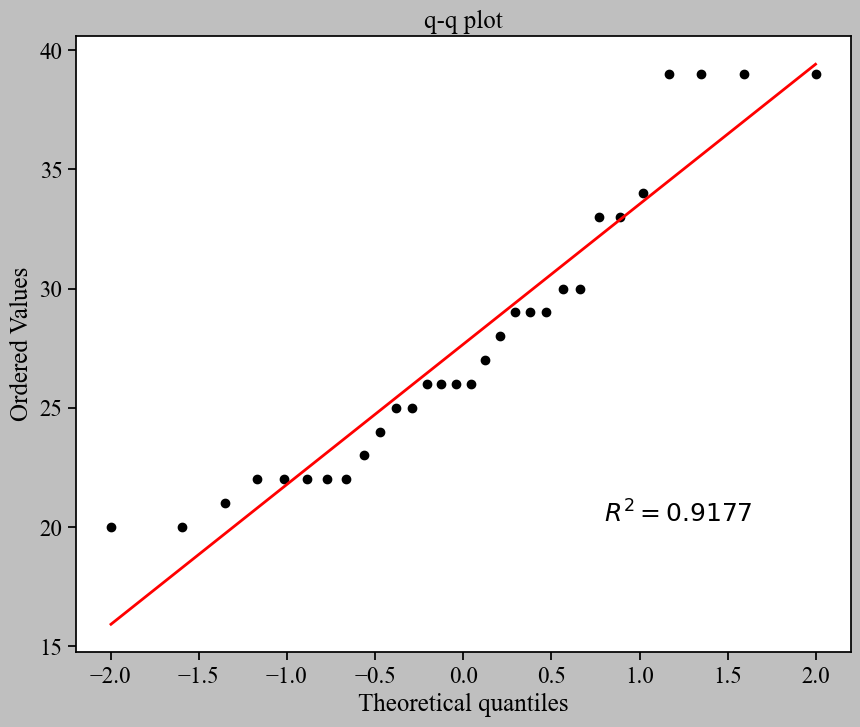

In [15]:
sm.progress(method = 'shapiro', vars = 'age').figure()

z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
all,30.0,0.736,0.427,1.724,-0.4,0.833,-0.48,1.96,The normality assumption is met.



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.


<Axes: title={'center': 'q-q plot'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>

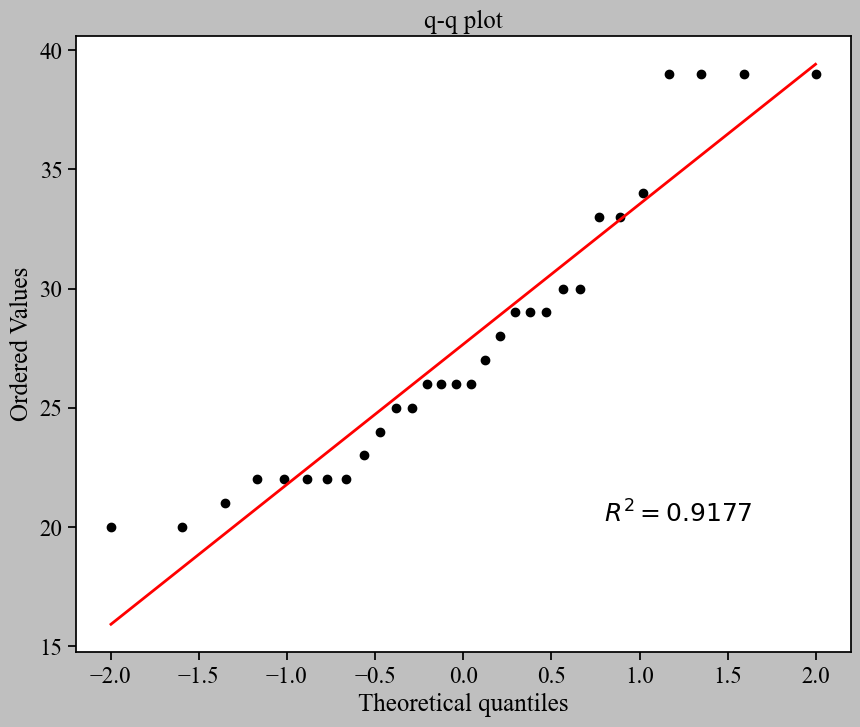

In [16]:
sm.progress(method = 'z_normal', vars = 'age').figure()

Group variable : sex
Comparison groups : ['female' 'male']
Test statistics = 1.957, p = 0.173

Conclusion : The homoskedasticity assumption is met


<Axes: title={'center': 'Variance of age by sex'}, xlabel='sex', ylabel='age'>

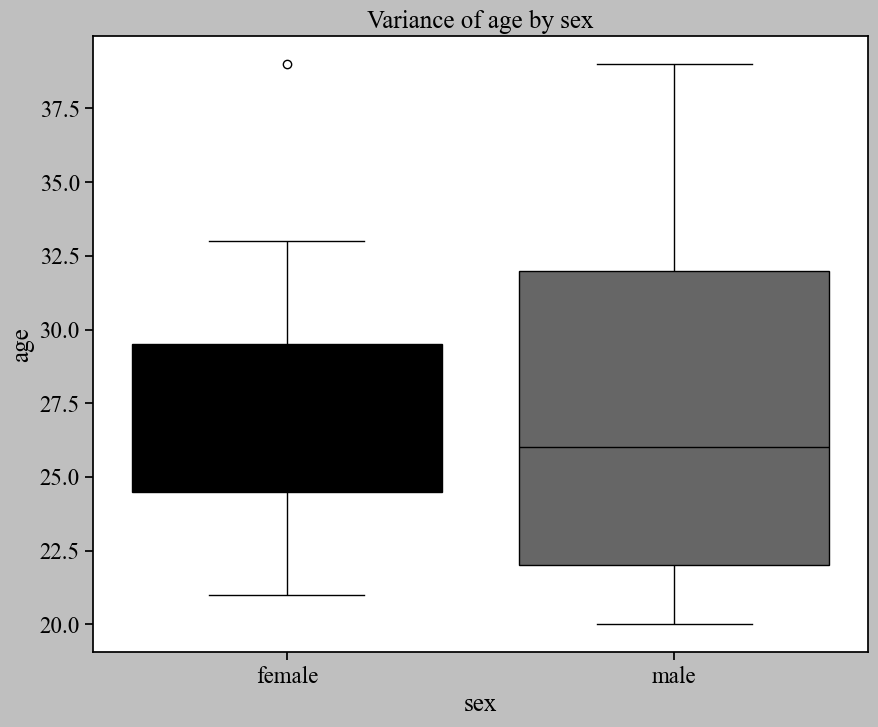

In [17]:
sm.progress(method = 'levene', vars = 'age', group_vars = 'sex').figure()

Group variable : condition
Comparison groups : ['test_group' 'sham_group' 'control_group']
Test statistics = 0.237, p = 0.791

Conclusion : The homoskedasticity assumption is met


<Axes: title={'center': 'Variance of age by condition'}, xlabel='condition', ylabel='age'>

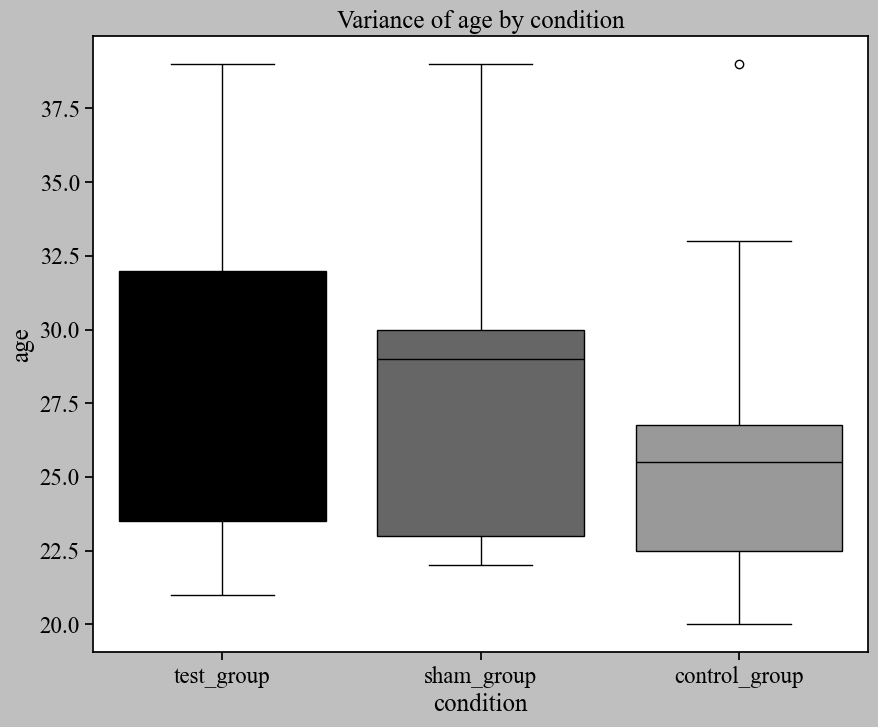

In [18]:
sm.progress(method = 'levene', vars = 'age', group_vars = 'condition').figure()

F-max Test
Variable: age
Group variable : sex
No. of groups = 2
Included groups : ['female' 'male']

Max variance among groups = 48.143
Min variance among groups = 23.810
F-max statistic = 2.022

Conclusion : The homoskedasticity assumption is met

Reference:
[1] Fidell, L. S., & Tabachnick, B. G. (2003). Preparatory data analysis. Handbook of psychology: Research methods in psychology, 2, 115-141.



<Axes: title={'center': 'Variance of age by sex'}, xlabel='sex', ylabel='age'>

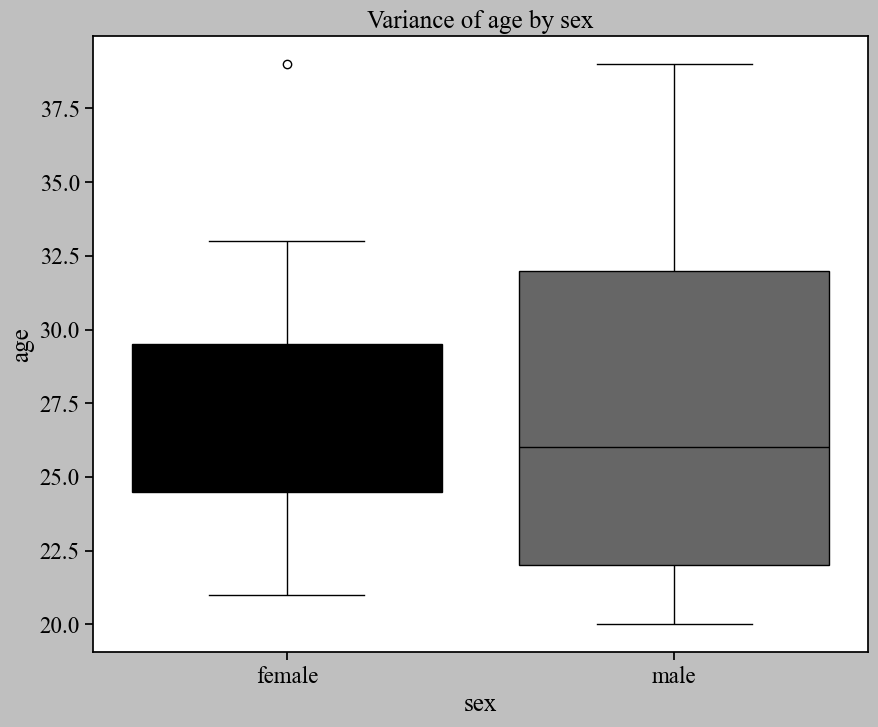

In [19]:
sm.progress(method = 'fmax', vars = 'age', group_vars = 'sex').figure()

F-max Test
Variable: age
Group variable : sex
No. of groups = 2
Included groups : ['female' 'male']

Max variance among groups = 48.143
Min variance among groups = 23.810
F-max statistic = 2.022

Conclusion : The homoskedasticity assumption is met

Reference:
[1] Fidell, L. S., & Tabachnick, B. G. (2003). Preparatory data analysis. Handbook of psychology: Research methods in psychology, 2, 115-141.



<Axes: title={'center': 'Variance of age by sex'}, xlabel='sex', ylabel='age'>

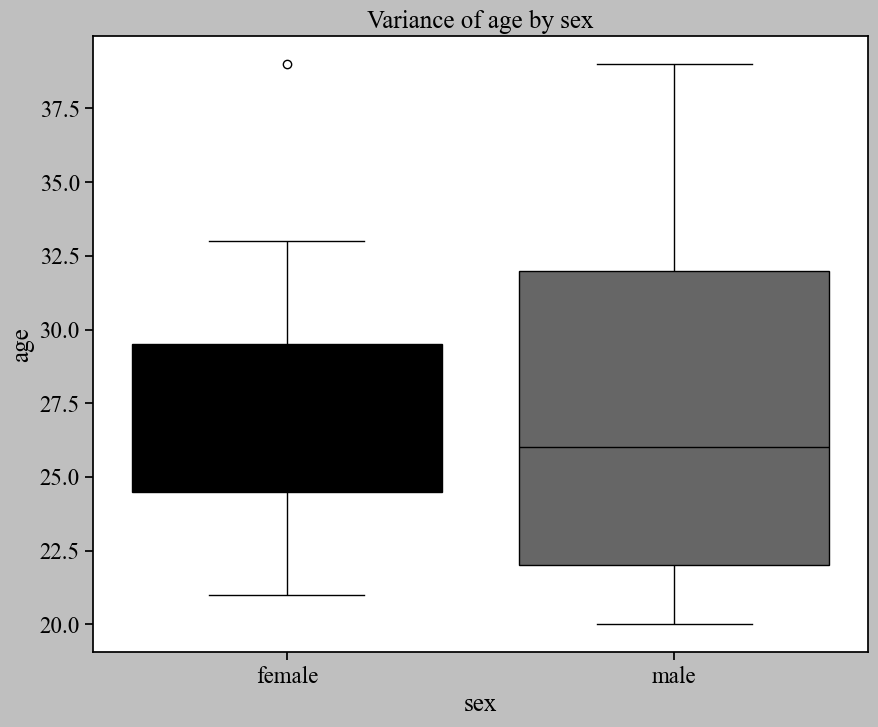

In [20]:
sm.progress(method = 'fmax', vars = 'age', group_vars = 'sex').figure()

Correlation analysis: Pearson's r (Pearson correlation coefficient)
Max n = 30


,n,Pearson's r,p-value,95%_confidence_interval
set,,,,
income & prescore,30,-0.103,0.588,"[-0.447, 0.267]"
income & age,30,-0.051,0.789,"[-0.404, 0.315]"
prescore & age,30,-0.044,0.816,"[-0.398, 0.321]"


,income,prescore,age
income,1.000,-0.103,-0.051
prescore,-0.103,1.000,-0.044
age,-0.051,-0.044,1.000


* p < .05


<Axes: title={'center': "Heatmap for correlation coefficients (Pearson's r)"}>

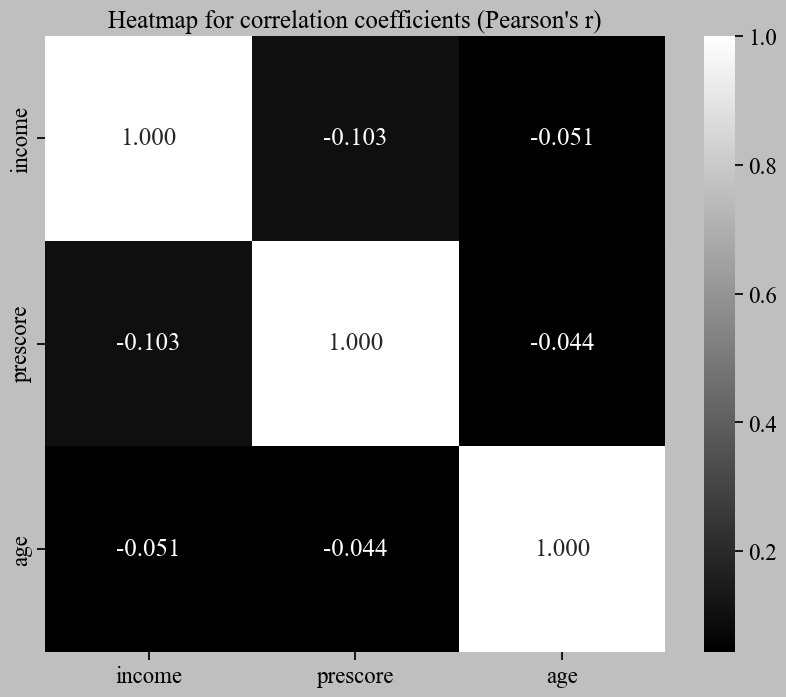

In [21]:
sm.progress(method = 'pearsonr', vars = ['income', 'prescore', 'age']).figure()

Correlation analysis: Spearman's rho (Spearman's rank correlation coefficient)
Max n = 30


,n,Spearman's rho,p-value
set,,,
income & prescore,30,-0.138,0.468
income & age,30,-0.015,0.936
prescore & age,30,-0.057,0.763


,income,prescore,age
income,1.000,-0.138,-0.015
prescore,-0.138,1.000,-0.057
age,-0.015,-0.057,1.000


* p < .05


<Axes: title={'center': "Heatmap for correlation coefficients (Spearman's r)"}>

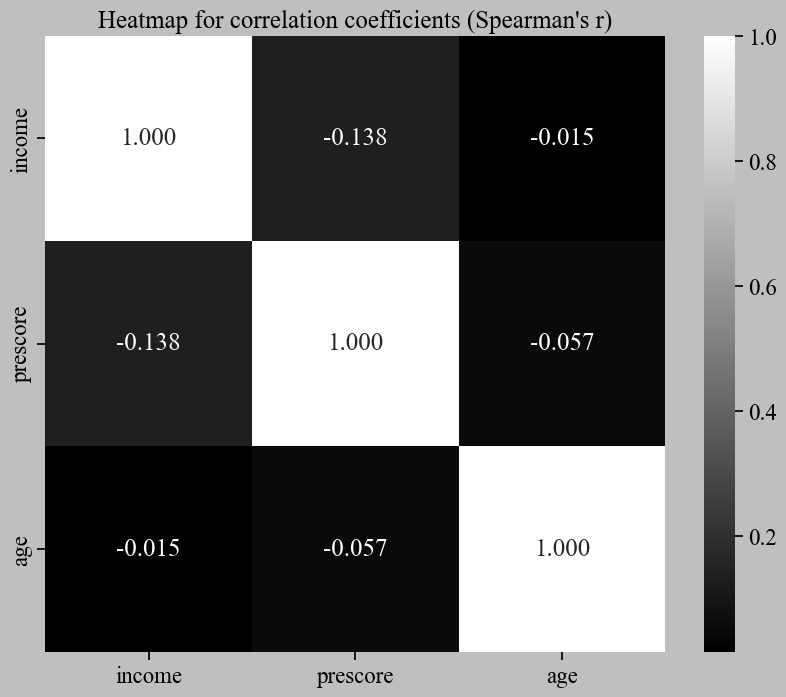

In [22]:
sm.progress(method = 'spearmanr', vars = ['income', 'prescore', 'age']).figure()

Correlation analysis: Kendall's tau (Kendall's tau correlation coefficient)
Max n = 30


,n,Kendall's tau,p-value
set,,,
income & prescore,30,-0.106,0.428
income & age,30,-0.017,0.900
prescore & age,30,-0.047,0.731


,income,prescore,age
income,1.000,-0.106,-0.017
prescore,-0.106,1.000,-0.047
age,-0.017,-0.047,1.000


* p < .05


<Axes: title={'center': "Heatmap for correlation coefficients (Kendall's tau)"}>

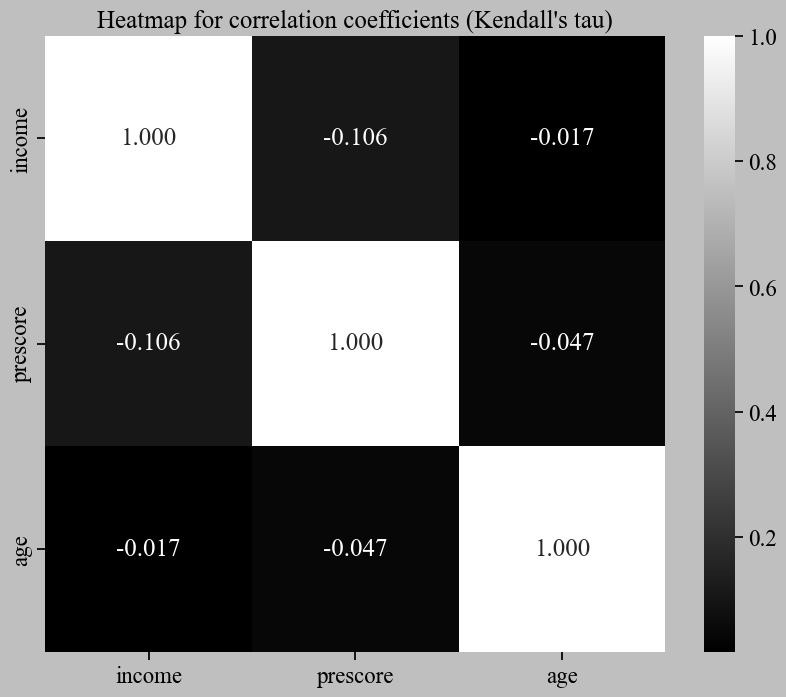

In [23]:
sm.progress(method = 'kendallt', vars = ['income', 'prescore', 'age']).figure()

Indenpendent Samples T-test
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,t-value,degree of freedom,p-value,95% CI,Cohen'd
dependent variable,,,,,
age,-0.304,28.0,0.763,"[-5.153, 3.820]",-0.111


<Axes: title={'center': 'Mean differences in age by sex'}, xlabel='sex', ylabel='age'>

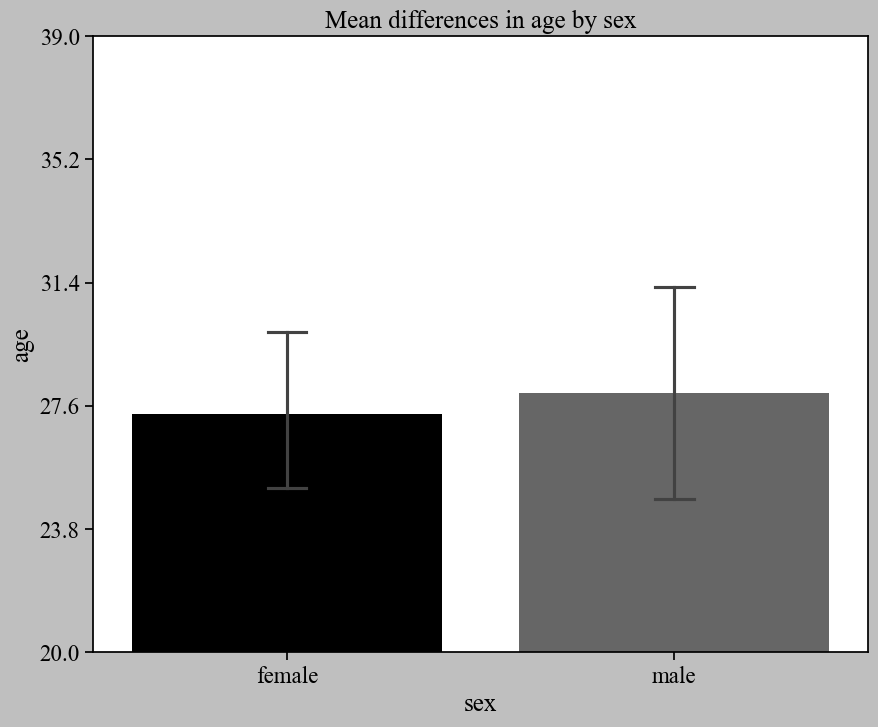

In [24]:
sm.progress(method = 'ttest_ind', vars = 'age', group_vars = 'sex').figure()

Mann-Whitney U Test (Wilcoxon Rank Sum Test)
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,U-value,Z-value,p-value,Rank-biserial Correlation
dependent variable,,,,
age,112.0,-0.021,1.0,0.004


<Axes: title={'center': 'Median differences in age by sex'}, xlabel='sex', ylabel='age'>

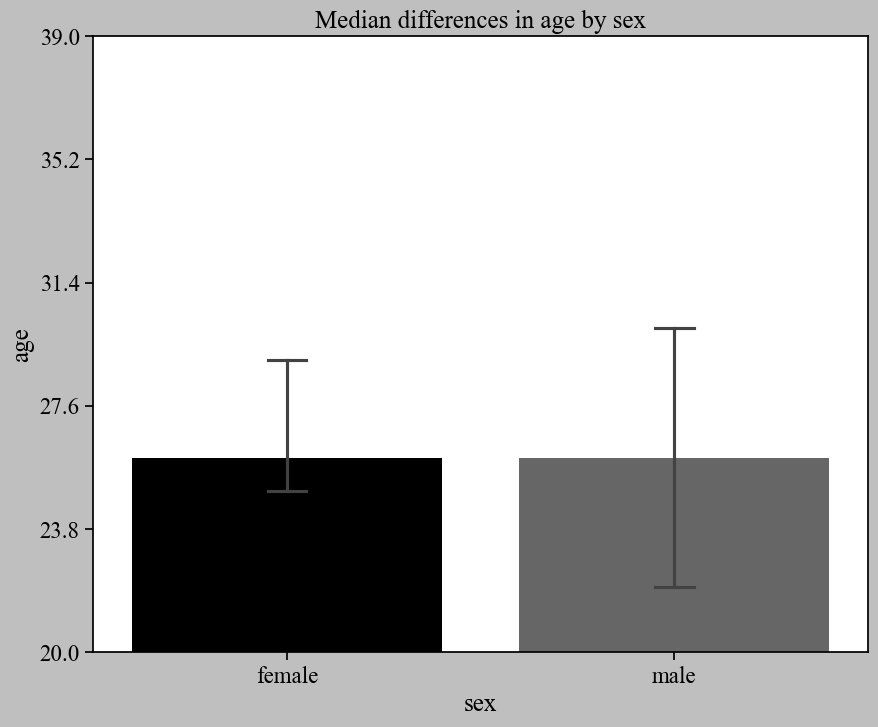

In [25]:
sm.progress(method = 'mannwhitneyu', vars = 'age', group_vars = 'sex').figure()

Brunner-Munzel Test
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,W-value,p-value
dependent variable,,
age,0.02,0.984


<Axes: title={'center': 'Median differences in age by sex'}, xlabel='sex', ylabel='age'>

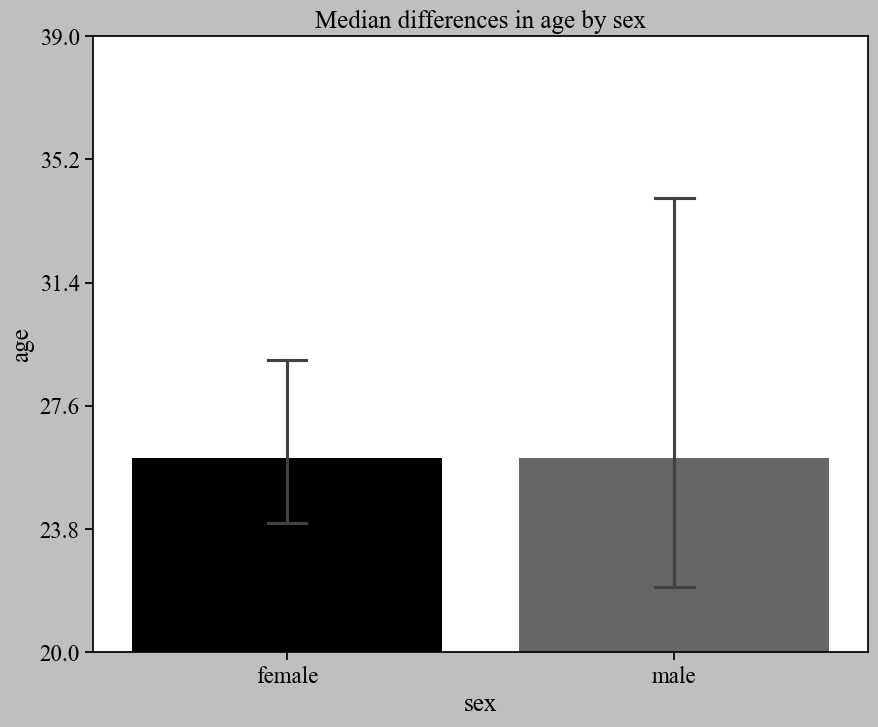

In [26]:
sm.progress(method = 'brunner', vars = 'age', group_vars = 'sex').figure()

One-way ANOVA
Variable : age
Group variable : condition
Comparison group : ['test_group' 'sham_group' 'control_group']
Decriptive analysis: 


,control_group,sham_group,test_group
n,10.000,10.000,10.00
mean,26.200,28.300,28.50
median,25.500,29.000,27.00
std,5.884,5.559,6.57
min,20.000,22.000,21.00
max,39.000,39.000,39.00


,sum_sq,df,F,p-value,partial eta squared
Intercept,6864.400,1.0,189.469,0.000,0.872
C(condition),32.467,2.0,0.448,0.644,0.004
Residual,978.200,27.0,NaN,NaN,0.124


Posthoc: 


group1,group2,stat,pval,pval_corr,reject
control_group,sham_group,-0.8204,0.4227,1.0,False
control_group,test_group,-0.8246,0.4204,1.0,False
sham_group,test_group,-0.0735,0.9422,1.0,False


<Axes: title={'center': 'Mean differences in age by condition'}, xlabel='condition', ylabel='age'>

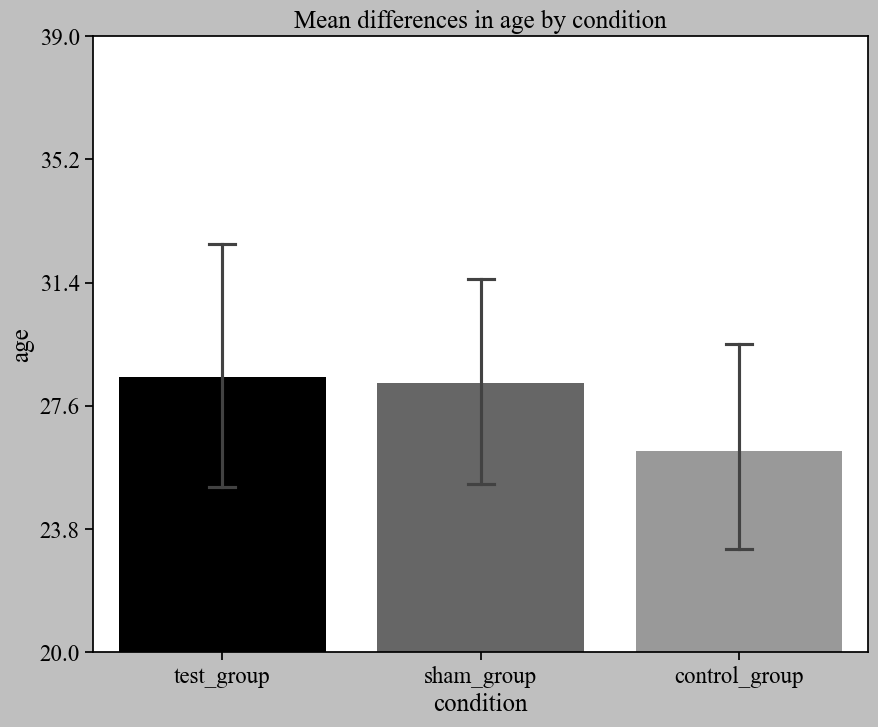

In [27]:
sm.progress(method = 'f_oneway', vars = 'age', group_vars = 'condition', posthoc = True).figure()

Kruskal-Wallis Test
Variable : age
Group variable : condition
Comparison group : ['test_group' 'sham_group' 'control_group']
Decriptive analysis: 


,control_group,sham_group,test_group
n,10.000,10.000,10.00
mean,26.200,28.300,28.50
median,25.500,29.000,27.00
std,5.884,5.559,6.57
min,20.000,22.000,21.00
max,39.000,39.000,39.00


,H-value,degree of freedom,p-value
dependent variable,,,
age,1.319,2.0,0.517


Posthoc: 


group1,group2,stat,pval,pval_corr,reject
control_group,sham_group,36.0,0.3042,0.9126,False
control_group,test_group,38.5,0.4035,1.0,False
sham_group,test_group,53.0,0.849,1.0,False


<Axes: title={'center': 'Median differences in age by condition'}, xlabel='condition', ylabel='age'>

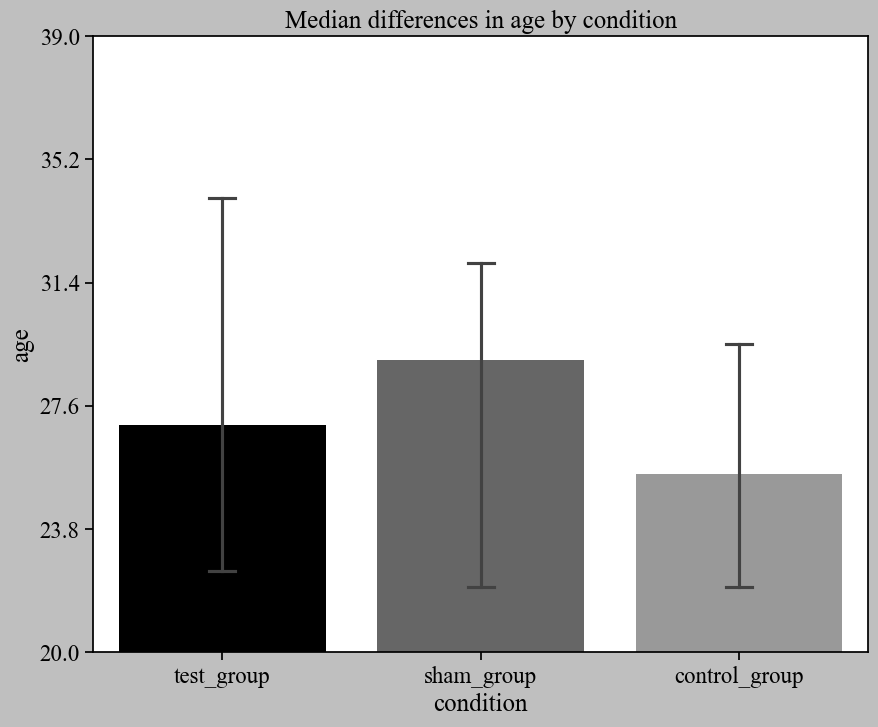

In [28]:
sm.progress(method = 'kruskal', vars = 'age', group_vars = 'condition', posthoc = True).figure()

Dependent Samples T-test
Variables : prescore, postscore
n = 30
Descriptive analysis: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",1.198,29.0,0.24,"[-0.636, 2.436]",0.313


<Axes: title={'center': 'Mean difference between prescore, postscore'}>

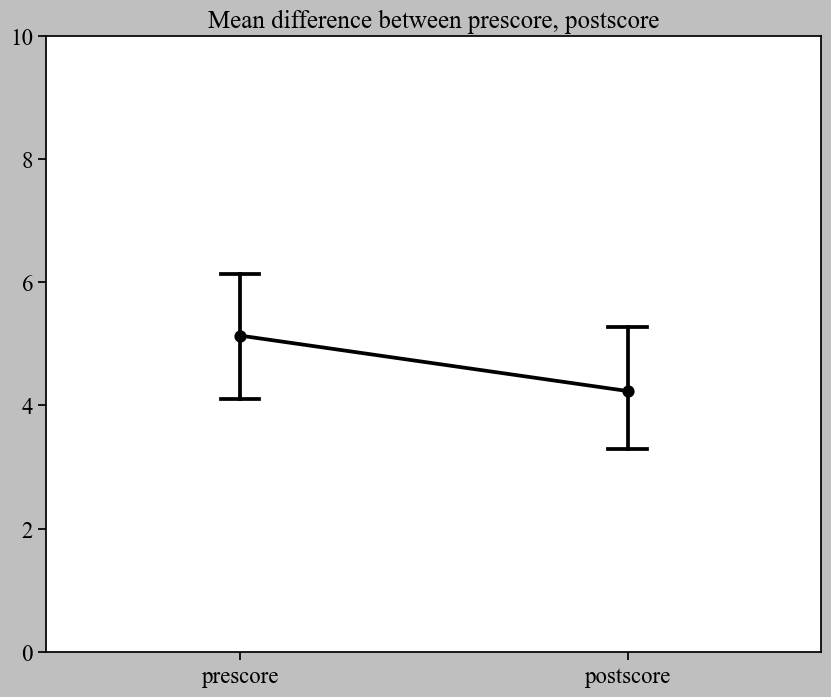

In [29]:
sm.progress(method = 'ttest_rel', vars = ['prescore', 'postscore']).figure()

Wilcoxon-Signed Rank Test
Variables : prescore, postscore
n = 30
Descriptive analysis: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,Test-Statistic,Z-value,p-value,Rank-biserial correlation
variables,,,,
"['prescore', 'postscore']",144.0,-1.35,0.177,-0.247


<Axes: title={'center': 'Median difference between prescore, postscore'}>

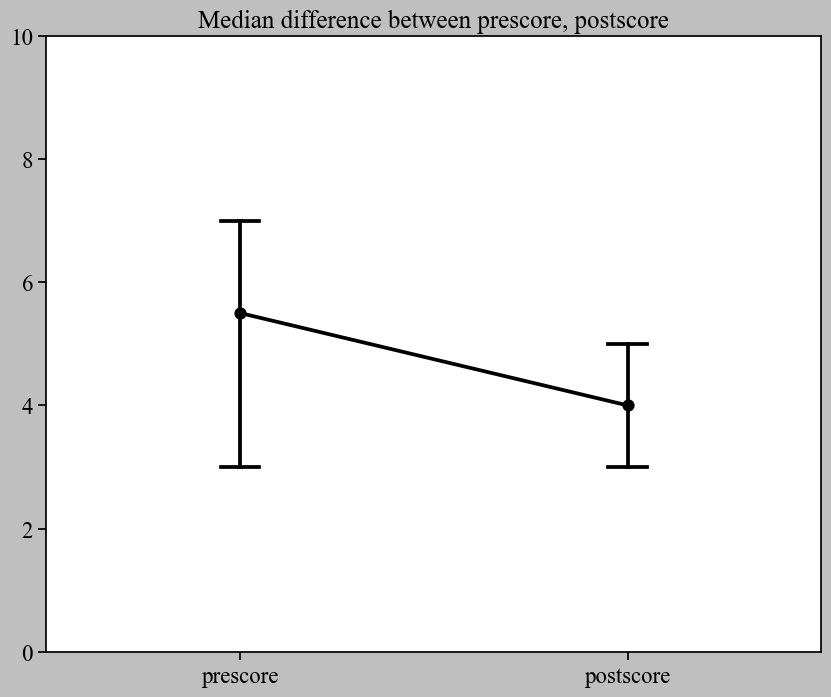

In [30]:
sm.progress(method = 'wilcoxon', vars = ['prescore', 'postscore']).figure()

One-way Repeated Measures ANOVA
Variables: ['prescore', 'postscore', 'fupscore'], No. of time-point = 3
Descriptive anaylsis by variables: 



,prescore,postscore,fupscore
n,30.000,30.000,30.000
mean,5.133,4.233,4.367
median,5.500,4.000,4.000
std,2.849,2.909,2.619
min,0.000,0.000,1.000
max,10.000,10.000,9.000


,F Value,Num DF,Den DF,p-value,partial eta squared
variable,1.079,2.0,58.0,0.347,0.02


<Axes: title={'center': 'Mean difference between prescore, postscore, fupscore'}>

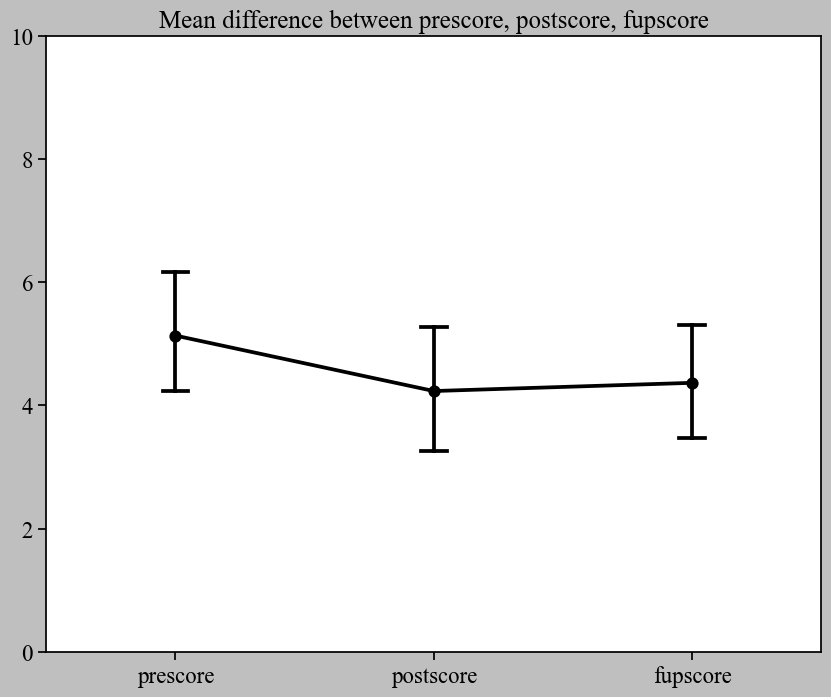

In [31]:
sm.progress(method = 'f_oneway_rm', vars = ['prescore', 'postscore', 'fupscore']).figure()

Friedman Test
Variables: ['prescore', 'postscore', 'fupscore'], No. of time-point = 3
Descriptive anaylsis by variables: 



,prescore,postscore,fupscore
n,30.000,30.000,30.000
mean,5.133,4.233,4.367
median,5.500,4.000,4.000
std,2.849,2.909,2.619
min,0.000,0.000,1.000
max,10.000,10.000,9.000


,correcting for ties,p-value
variables,,
"['prescore', 'postscore', 'fupscore']",3.911,0.142


<Axes: title={'center': 'Median difference between prescore, postscore, fupscore'}>

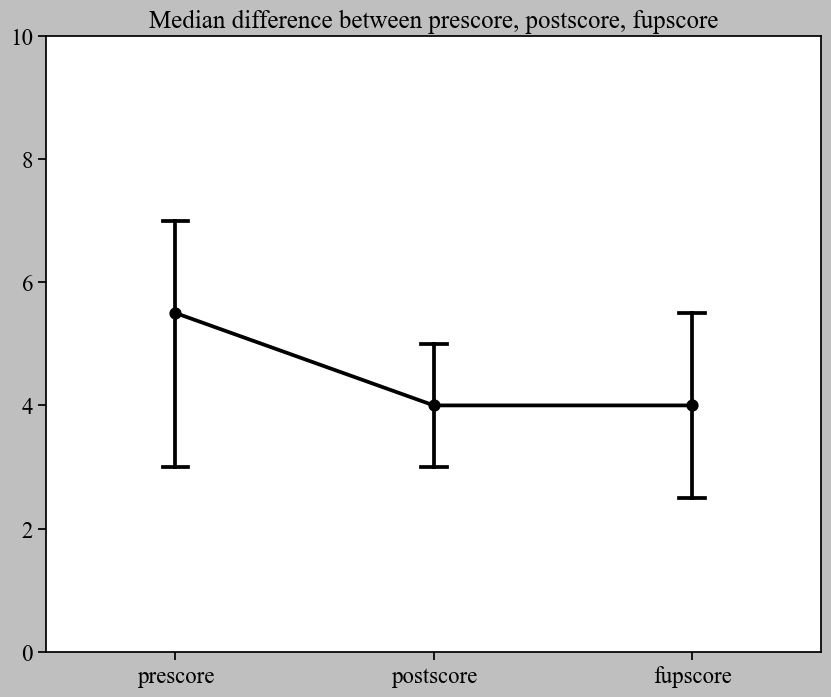

In [32]:
sm.progress(method = 'friedman', vars = ['prescore', 'postscore', 'fupscore']).figure()

The trim ratio wasn't entered, so the analysis proceeds with set the trim ratio as 0.2.
The trim ratio is recommended to be set ranging from 0 to 0.5
See the reference below for more information.

Reference:
[1] Guo, J. H., & Luh, W. M. (2009). Optimum sample size allocation to minimize cost or maximize power for the two‐sample trimmed mean test. British Journal of Mathematical and Statistical Psychology, 62(2), 283-298.
[2] Yuen, K. K. (1974). The two-sample trimmed t for unequal population variances. Biometrika, 61(1), 165-170.


Yuen's Two-Sample T-test (Independent samples t-test using unequal variance)
Note: The analysis will trim the top and bottom 20.00% data based on percentage.

Variable : prescore
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,9,9
mean,6.0,4.444
median,6.0,4.0
std,2.0,1.509
min,3,3
max,8,7


,t-value,degree of freedom,p-value,95% CI
dependent variable,,,,
prescore,1.238,16.0,0.234,"[-1.109, 4.220]"


<Axes: title={'center': 'Mean differences in prescore by sex (Trim ratio :20.00%)'}, xlabel='sex', ylabel='prescore'>

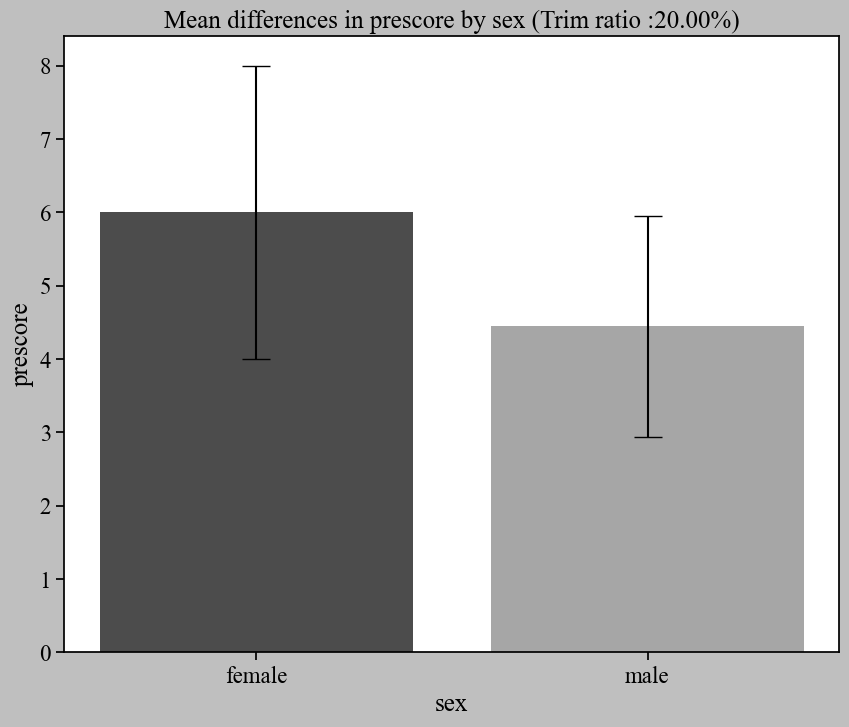

In [33]:
sm.progress(method = 'ttest_ind_trim', vars = 'prescore', group_vars = 'sex').figure()

2-way ANOVA
Dependent variables : income 
Independent variables : ['sex', 'condition']


Descripitive analysis: income by sex


,n,mean,median,std,min,max
sex,,,,,,
female,15,334.13,329.0,76.02,203,436
male,15,294.80,297.0,101.40,150,445


Descripitive analysis: income by condition


,n,mean,median,std,min,max
condition,,,,,,
control_group,10,274.7,243.0,103.02,150,416
sham_group,10,344.0,357.5,82.67,182,436
test_group,10,324.7,306.0,77.34,237,445


Descripitive analysis: income by Interaction


n   mean  median    std  min  max
sex    condition                                       
female control_group  5  325.0   346.0  93.82  203  416
       sham_group     5  373.6   390.0  57.27  300  436
       test_group     5  303.8   303.0  70.29  237  409
male   control_group  5  224.4   183.0  93.54  150  383
       sham_group     5  314.4   332.0  99.54  182  427
       test_group     5  345.6   309.0  86.17  249  445

2-way ANOVA Statistics:



,sum_sq,df,F,p-value,partial_eta_squared
Intercept,528125.000,1.0,73.507,0.000,0.754
C(sex),25300.900,1.0,3.522,0.073,0.128
C(condition),12805.733,2.0,0.891,0.423,0.069
C(sex):C(condition),26827.267,2.0,1.867,0.176,0.135
Residual,172431.600,24.0,NaN,NaN,0.500


<Axes: title={'center': 'Mean difference in income between sex, condition'}, xlabel='sex', ylabel='income'>

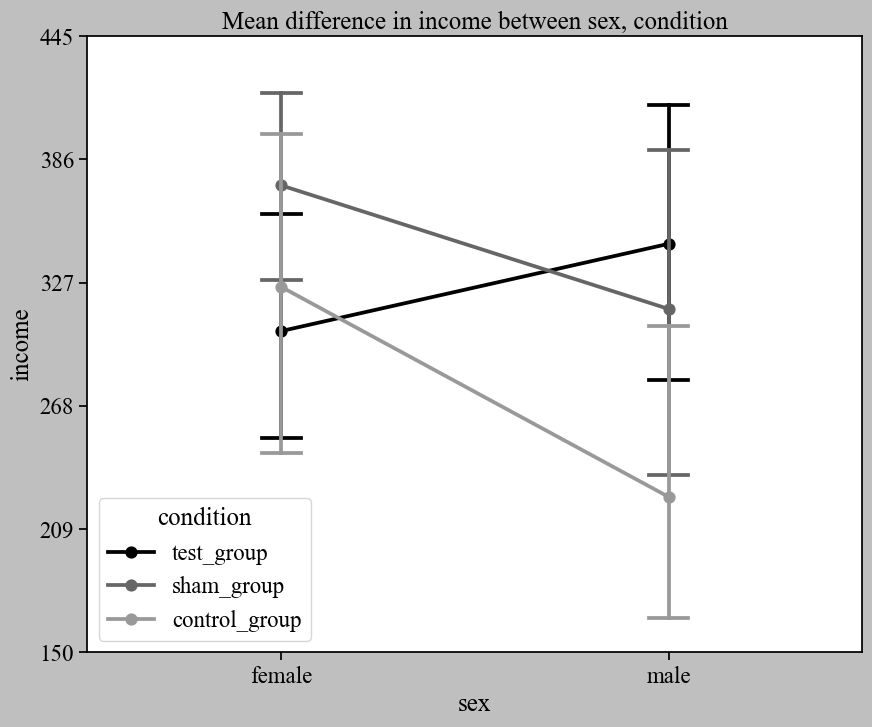

In [34]:
sm.progress(method = 'f_nway', vars = 'income', group_vars = ['sex', 'condition']).figure()

Dataframe change was successful. 

3-way ANOVA
Dependent variables : income 
Independent variables : ['sex', 'condition', 'job']


Descripitive analysis: income by sex


,n,mean,median,std,min,max
sex,,,,,,
female,44,321.32,315.5,69.75,214,448
male,56,313.46,307.0,84.03,180,447


Descripitive analysis: income by condition


,n,mean,median,std,min,max
condition,,,,,,
sham_group,56,311.50,305.0,75.28,183,448
test_group,44,323.82,326.0,81.23,180,447


Descripitive analysis: income by job


,n,mean,median,std,min,max
job,,,,,,
police,36,298.86,280.0,73.91,184,447
psychologist,27,321.56,326.0,80.37,180,443
soldier,37,331.11,326.0,78.21,189,448


Descripitive analysis: income by Interaction


n    mean  median     std  min  max
sex    condition  job                                               
female sham_group police         8  286.25   275.5   56.88  214  375
                  psychologist   6  335.33   315.0   75.08  248  436
                  soldier       11  345.18   347.0   72.61  227  448
       test_group police         6  276.00   239.5   64.37  232  383
                  psychologist   9  341.89   359.0   76.06  237  443
                  soldier        4  326.50   331.0   41.36  279  365
male   sham_group police        11  269.18   274.0   55.43  184  364
                  psychologist   7  279.29   303.0   74.30  183  368
                  soldier       13  340.69   349.0   84.29  195  437
       test_group police        11  350.18   397.0   86.04  230  447
                  psychologist   5  327.60   358.0  103.43  180  418
                  soldier        9  302.11   297.0   90.89  189  443

3-way ANOVA Statistics:



,sum_sq,df,F,p-value,partial_eta_squared
Intercept,655512.500,1.0,113.620,0.000,0.564
C(sex),1349.285,1.0,0.234,0.630,0.003
C(condition),360.214,1.0,0.062,0.803,0.001
C(job),17106.490,2.0,1.483,0.233,0.033
C(sex):C(condition),17585.700,1.0,3.048,0.084,0.033
C(sex):C(job),5663.474,2.0,0.491,0.614,0.011
C(condition):C(job),1096.868,2.0,0.095,0.909,0.002
C(sex):C(condition):C(job),12334.659,2.0,1.069,0.348,0.024
Residual,507703.918,88.0,NaN,NaN,0.500


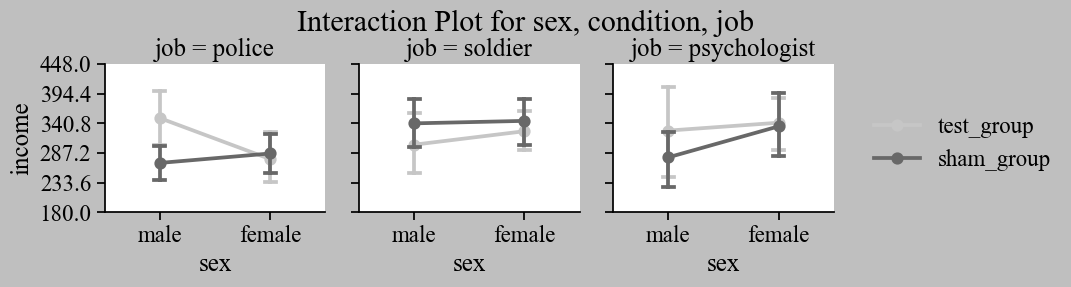

In [35]:
sm.change_dataframe(df2).progress(method = 'f_nway', vars = 'income', group_vars = ['sex', 'condition', 'job']).figure()

Dataframe change was successful. 

2-way Mixed Repeated Measures ANOVA
Repeated measures factor : ['prescore', 'postscore', 'fupscore'] (time) 
Group factors : sex


Descripitive analysis: value by sex


,n,mean,median,std,min,max
sex,,,,,,
female,45,5.22,5.0,2.80,1,10
male,45,3.93,4.0,2.66,0,9


Descripitive analysis: value by time


,n,mean,median,std,min,max
time,,,,,,
fupscore,30,4.37,4.0,2.62,1,9
postscore,30,4.23,4.0,2.91,0,10
prescore,30,5.13,5.5,2.85,0,10


Descripitive analysis: value by Interaction


n  mean  median   std  min  max
sex    time                                       
female fupscore   15  4.80     4.0  2.48    1    9
       postscore  15  5.07     4.0  3.03    1   10
       prescore   15  5.80     6.0  2.96    1   10
male   fupscore   15  3.93     3.0  2.76    1    9
       postscore  15  3.40     3.0  2.61    0    7
       prescore   15  4.47     4.0  2.67    0    9

2-way Mixed Repeated Measures ANOVA Statistics:



,sum_sq,df,F,p-value,partial_eta_squared
Intercept,345.600,1.0,45.360,0.000,0.351
C(sex),5.633,1.0,0.739,0.392,0.009
C(time),8.044,2.0,0.528,0.592,0.012
C(sex):C(time),2.422,2.0,0.159,0.853,0.004
Residual,640.000,84.0,NaN,NaN,0.500


<Axes: title={'center': 'Interaction Plot for sex'}, xlabel='time', ylabel='value'>

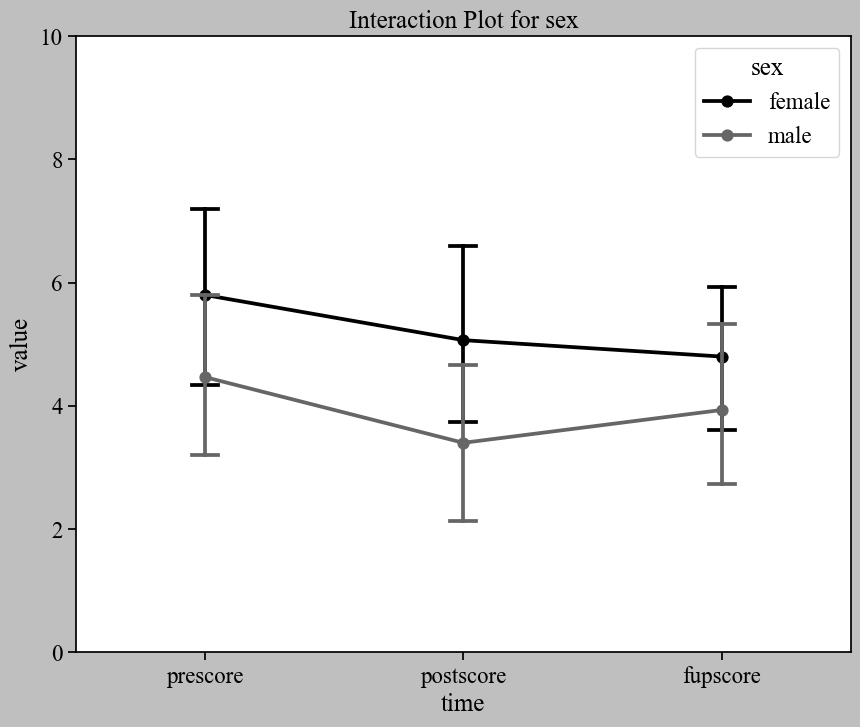

In [36]:
sm.change_dataframe(df).progress(method = 'f_nway_rm', vars =['prescore', 'postscore', 'fupscore'], group_vars = 'sex').figure() 

Dataframe change was successful. 

3-way Mixed Repeated Measures ANOVA
Repeated measures factor : ['prescore', 'postscore', 'fupscore'] (time) 
Group factors : ['sex', 'condition']


Descripitive analysis: value by sex


,n,mean,median,std,min,max
sex,,,,,,
female,45,5.22,5.0,2.80,1,10
male,45,3.93,4.0,2.66,0,9


Descripitive analysis: value by condition


,n,mean,median,std,min,max
condition,,,,,,
control_group,30,4.40,3.5,2.93,1,10
sham_group,30,4.87,4.0,2.54,0,10
test_group,30,4.47,4.0,2.96,0,10


Descripitive analysis: value by time


,n,mean,median,std,min,max
time,,,,,,
fupscore,30,4.37,4.0,2.62,1,9
postscore,30,4.23,4.0,2.91,0,10
prescore,30,5.13,5.5,2.85,0,10


Descripitive analysis: value by Interaction


n  mean  median   std  min  max
sex    condition     time                                      
female control_group fupscore   5   4.2     4.0  2.86    1    8
                     postscore  5   5.8     6.0  3.35    2   10
                     prescore   5   4.8     3.0  3.49    1    9
       sham_group    fupscore   5   5.8     6.0  2.86    2    9
                     postscore  5   3.0     3.0  1.22    1    4
                     prescore   5   7.2     6.0  2.17    5   10
       test_group    fupscore   5   4.4     4.0  1.82    2    7
                     postscore  5   6.4     5.0  3.36    3   10
                     prescore   5   5.4     7.0  3.13    2    8
male   control_group fupscore   5   3.2     2.0  2.95    1    8
                     postscore  5   2.4     2.0  1.67    1    5
                     prescore   5   6.0     6.0  2.55    3    9
       sham_group    fupscore   5   4.2     4.0  2.28    2    8
                     postscore  5   4.2     5.0  3.11    0    7
                     prescore   5   4.8     4.0  2.05    3    7
       test_group    fupscore   5   4.4     3.0  3.44    1    9
                     postscore  5   3.6     4.0  3.05    0    7
                     prescore   5   2.6     3.0  2.61    0    6

3-way Mixed Repeated Measures ANOVA Statistics:



,sum_sq,df,F,p-value,partial_eta_squared
Intercept,88.200,1.0,11.725,0.001,0.140
C(sex),2.500,1.0,0.332,0.566,0.005
C(condition),7.600,2.0,0.505,0.606,0.014
C(time),6.533,2.0,0.434,0.649,0.012
C(sex):C(condition),3.267,2.0,0.217,0.805,0.006
C(sex):C(time),26.467,2.0,1.759,0.179,0.047
C(condition):C(time),54.222,4.0,1.802,0.138,0.091
C(sex):C(condition):C(time),54.978,4.0,1.827,0.133,0.092
Residual,541.600,72.0,NaN,NaN,0.500


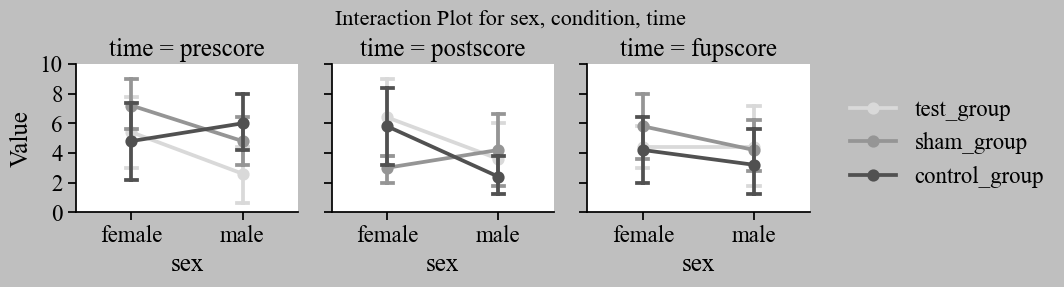

In [37]:
sm.change_dataframe(df).progress(method = 'f_nway_rm', vars =['prescore', 'postscore', 'fupscore'], group_vars = ['sex', 'condition']).figure() 

Linear Regression

Dependent variable: postscore
Independent variable: ['age', 'income', 'prescore', 'sex']
Note: Categorical independent variables are automatically dummy-coded. 


,Summary
Model:,OLS
Dependent Variable:,postscore
Date:,2024-05-14 22:07
No. Observations:,30
Df Model:,4
Df Residuals:,25
R-squared:,0.209
Adj. R-squared:,0.083
AIC:,151.1306
BIC:,158.1366


,unstandadrized coefficient,standard error,standardized coefficient beta,t,p-value,95% CI Low,95% CI High
const,10.827985,3.581767,0.000000,3.023085,0.005712,3.451198,18.204773
age,-0.167737,0.087895,-0.340428,-1.908373,0.067889,-0.348761,0.013287
income,-0.001500,0.005961,-0.046576,-0.251691,0.803338,-0.013778,0.010777
prescore,-0.116409,0.189606,-0.114036,-0.613951,0.544795,-0.506911,0.274093
dummy_male,-1.769069,1.083543,-0.309291,-1.632672,0.115072,-4.000667,0.462528


Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate                that there are strong multicollinearity or other numerical                problems.


<Axes: title={'center': 'Residual plot'}, xlabel='Predicted Values', ylabel='Residuals'>

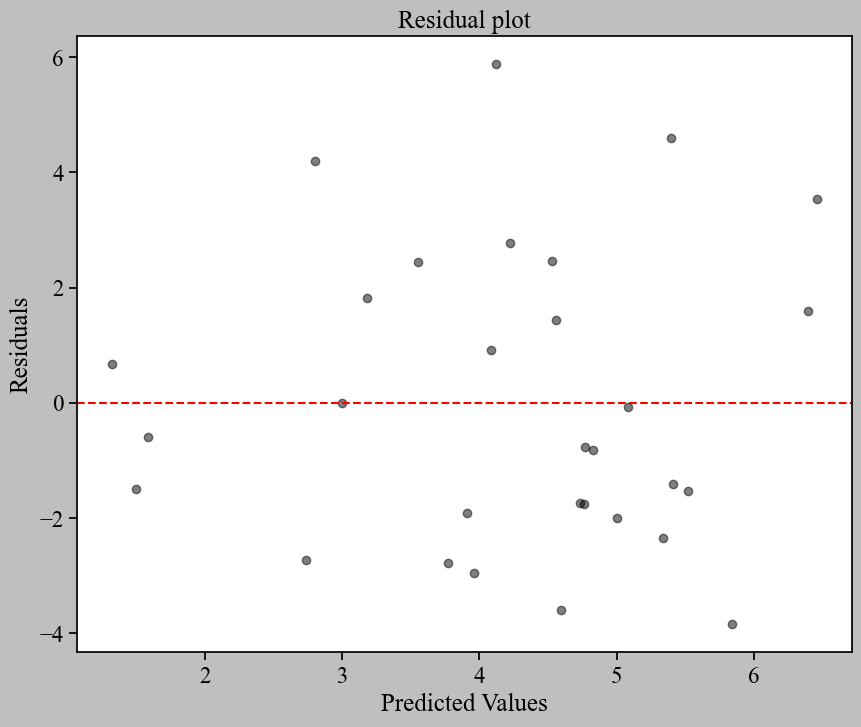

In [38]:
sm.progress(method = 'linearr', vars = ['postscore', ['age', 'income', 'prescore', 'sex']]).figure()

Hierarchical Linear Regression


,added_vars,R-squared of Model,p-value of Model,R-squared increased,F,p-value of F
Step 1,None,0.209,0.192,NaN,NaN,NaN
Step 2,fupscore,0.222,0.270,0.013,0.401,0.533


,Step 1,Step 2
Model:,OLS,OLS
Dependent Variable:,postscore,postscore
Date:,2024-05-14 22:07,2024-05-14 22:07
No. Observations:,30,30
Df Model:,4,5
Df Residuals:,25,24
R-squared:,0.209,0.222
Adj. R-squared:,0.083,0.060
AIC:,151.1306,152.6380
BIC:,158.1366,161.0452


Step 1                 \
           unstandadrized coefficient standard error   
const                       10.827985       3.581767   
age                         -0.167737       0.087895   
income                      -0.001500       0.005961   
prescore                    -0.116409       0.189606   
dummy_male                  -1.769069       1.083543   
fupscore                          NaN            NaN   

                                                                         \
           standardized coefficient beta         t   p-value 95% CI Low   
const                           0.000000  3.023085  0.005712   3.451198   
age                            -0.340428 -1.908373  0.067889  -0.348761   
income                         -0.046576 -0.251691  0.803338  -0.013778   
prescore                       -0.114036 -0.613951  0.544795  -0.506911   
dummy_male                     -0.309291 -1.632672  0.115072  -4.000667   
fupscore                             NaN       NaN       NaN        NaN   

                                           Step 2                 \
           95% CI High unstandadrized coefficient standard error   
const        18.204773                   9.978973       3.867856   
age           0.013287                  -0.154297       0.091494   
income        0.010777                  -0.001405       0.006036   
prescore      0.274093                  -0.152682       0.200376   
dummy_male    0.462528                  -1.703453       1.101774   
fupscore           NaN                   0.137516       0.218170   

                                                                         \
           standardized coefficient beta         t   p-value 95% CI Low   
const                           0.000000  2.579975  0.016431   1.996111   
age                            -0.313150 -1.686414  0.104674  -0.343131   
income                         -0.043608 -0.232720  0.817952  -0.013863   
prescore                       -0.149570 -0.761979  0.453496  -0.566237   
dummy_male                     -0.297819 -1.546100  0.135166  -3.977402   
fupscore                        0.123832  0.630312  0.534446  -0.312766   

                        
           95% CI High  
const        17.961836  
age           0.034538  
income        0.011054  
prescore      0.260873  
dummy_male    0.570497  
fupscore      0.587797

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate                that there are strong multicollinearity or other numerical                problems.


<Axes: title={'center': 'Residual plot'}, xlabel='Predicted Values', ylabel='Residuals'>

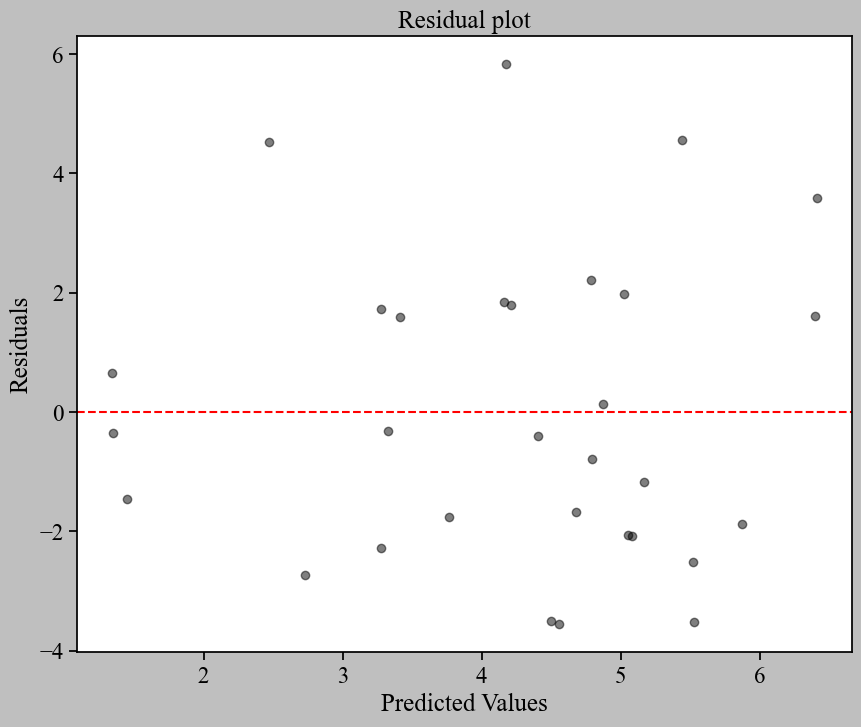

In [39]:
sm.progress(method = 'hier_linearr', vars = ['postscore', ['age', 'income', 'prescore', 'sex'], ['fupscore']]).figure()

Optimization terminated successfully.
         Current function value: 0.585252
         Iterations 5
Logistic Regression

Dependent variable: sex


Independent variable: ['income', 'prescore', 'postscore']
Note: Categorical independent variables are automatically dummy-coded. 


,Summary
Model:,Logit
Dependent Variable:,dummy_male
Date:,2024-05-14 22:07
No. Observations:,30
Df Model:,3
Df Residuals:,26
Converged:,1.0000
No. Iterations:,5.0000
Method:,MLE
Pseudo R-squared:,0.156


,coefficient,standard error,t,p-value,95% CI Low,95% CI High
const,4.209,2.139,1.968,0.049,0.017,8.402
income,-0.006,0.005,-1.309,0.190,-0.016,0.003
prescore,-0.223,0.151,-1.479,0.139,-0.518,0.072
postscore,-0.235,0.151,-1.561,0.118,-0.530,0.060


,OR (Odds ratio)
const,67.311087
income,0.993532
prescore,0.800279
postscore,0.790491


Optimization terminated successfully.
         Current function value: 0.585252
         Iterations 5


<Axes: title={'center': 'ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

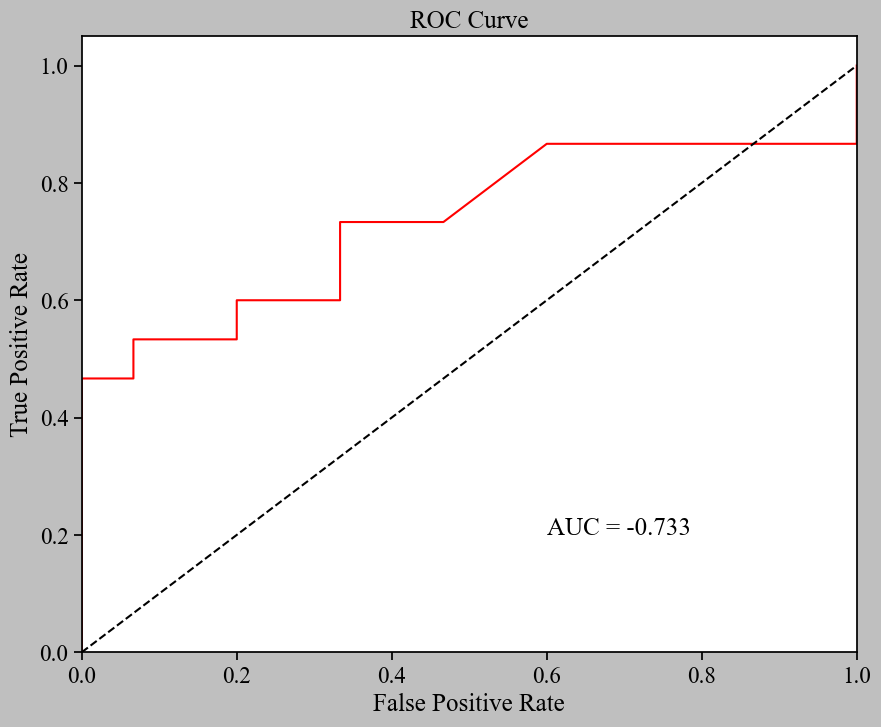

In [40]:
sm.progress(method = 'logisticr', vars = ['sex', ['income', 'prescore', 'postscore']]).figure()

<hr>   

# set Language  & change dataframe 테스트

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

*****
Note: 아래 조건에 부합하는 데이터에 한해서만 분석이 진행됩니다.
sex == male
*****

Kolmogorov-Smirnov Test
주의: 적어도 하나 이상의 경우에서 표본 수가 30보다 적습니다. 정규성 가정 충족 여부를 확인하기 위해 다른 분석을 고려하십시오. 


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
all,15.0,0.172,0.704,23.0,1.0,정규성 가정 충족


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

*****
Note: 아래 조건에 부합하는 데이터에 한해서만 분석이 진행됩니다.
sex == male
*****

Kolmogorov-Smirnov Test


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
all,56.0,0.126,0.31,36.0,-1.0,정규성 가정 충족


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

*****
Note: Only data that meets the following conditions will be analyzed.
sex == male
*****

Kolmogorov-Smirnov Test


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
all,15.0,0.172,0.704,23.0,1.0,The normality assumption is met.


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

*****
Note: Only data that meets the following conditions will be analyzed.
sex == male
*****

Kolmogorov-Smirnov Test


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
all,56.0,0.126,0.31,36.0,-1.0,The normality assumption is met.


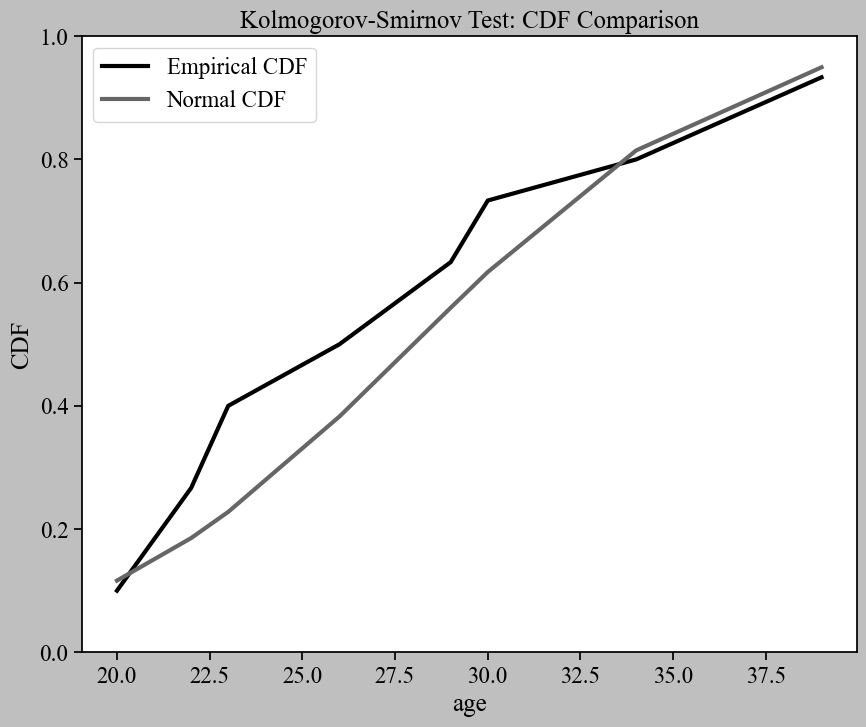

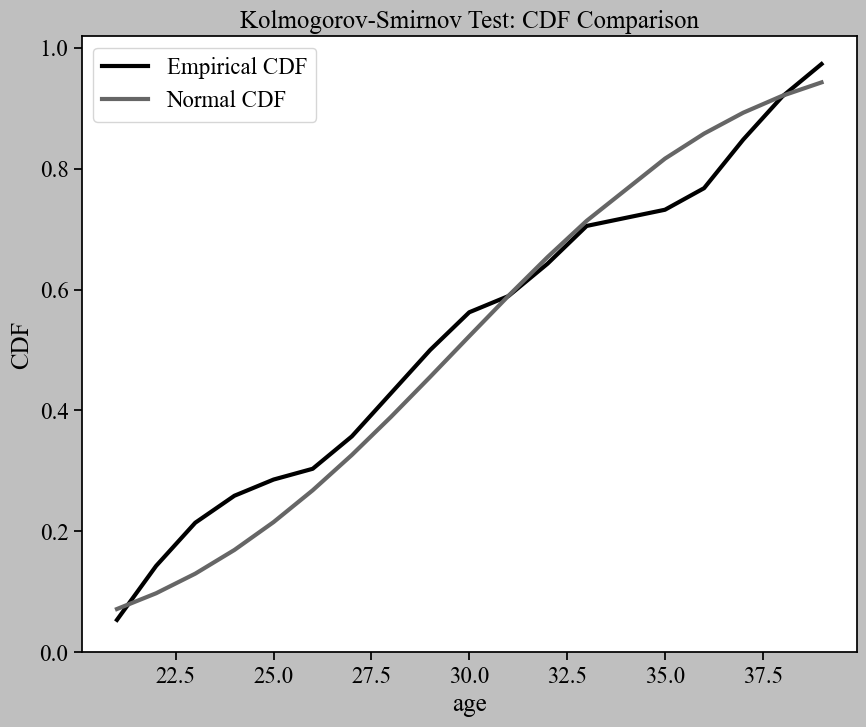

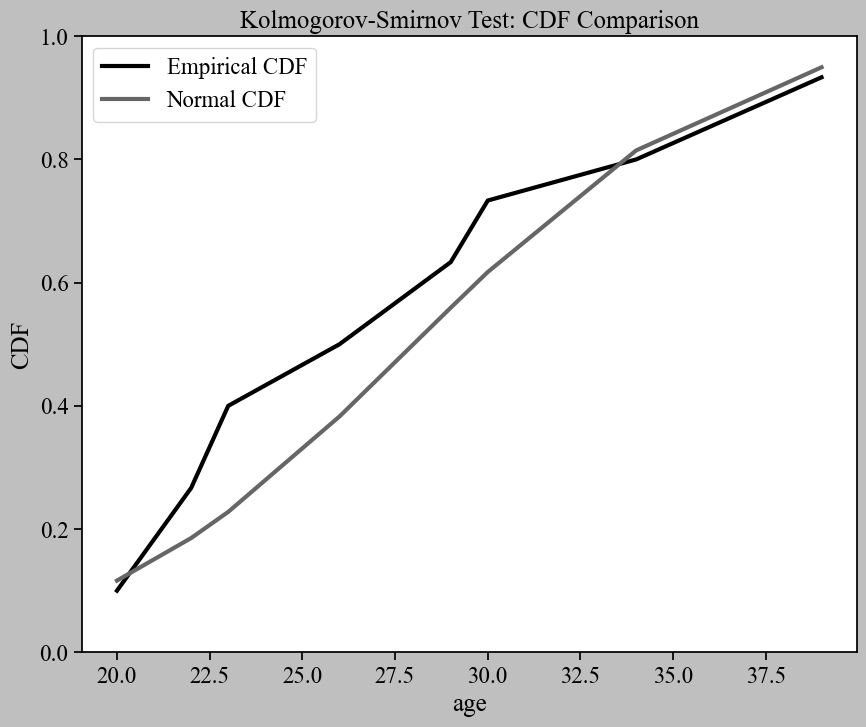

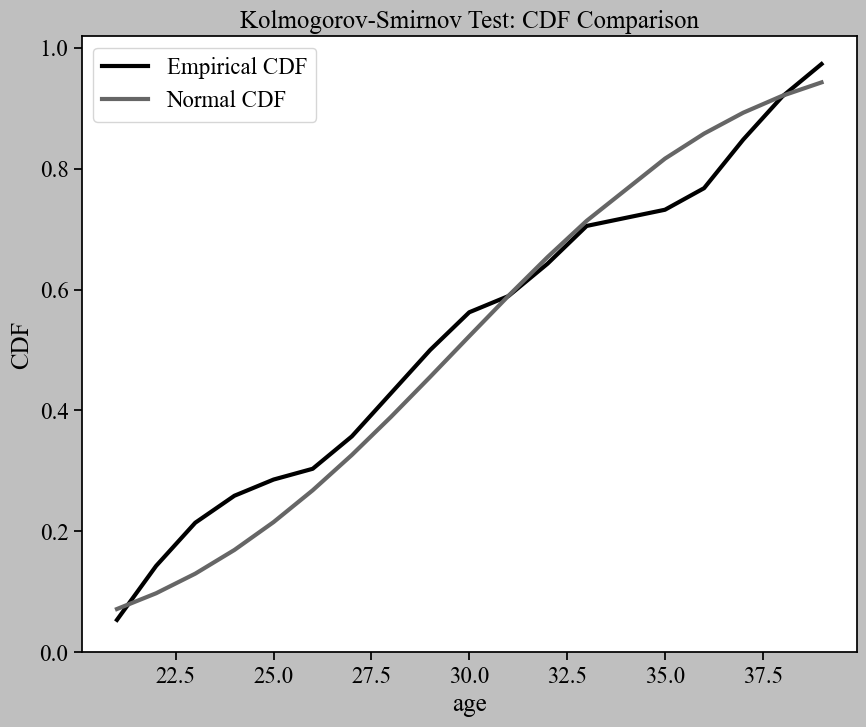

In [41]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'kstest', vars = 'age' , selector = {'sex' : 'male'}).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

*****
Note: 아래 조건에 부합하는 데이터에 한해서만 분석이 진행됩니다.
sex == male
*****

Shapiro-Wilks Test


,n,test statistic,p-value,conclusion
set,,,,
all,15.0,0.876,0.042,정규성 가정 미충족


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

*****
Note: 아래 조건에 부합하는 데이터에 한해서만 분석이 진행됩니다.
sex == male
*****

Shapiro-Wilks Test
주의: 적어도 하나 이상의 경우에서 표본 수가 30보다 많습니다. 정규성 가정 충족 여부를 확인하기 위해 다른 분석을 고려하십시오. 


,n,test statistic,p-value,conclusion
set,,,,
all,56.0,0.925,0.002,정규성 가정 미충족


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

*****
Note: Only data that meets the following conditions will be analyzed.
sex == male
*****

Shapiro-Wilks Test


,n,test statistic,p-value,conclusion
set,,,,
all,15.0,0.876,0.042,The normality assumption is not met.


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

*****
Note: Only data that meets the following conditions will be analyzed.
sex == male
*****

Shapiro-Wilks Test


,n,test statistic,p-value,conclusion
set,,,,
all,56.0,0.925,0.002,The normality assumption is not met.


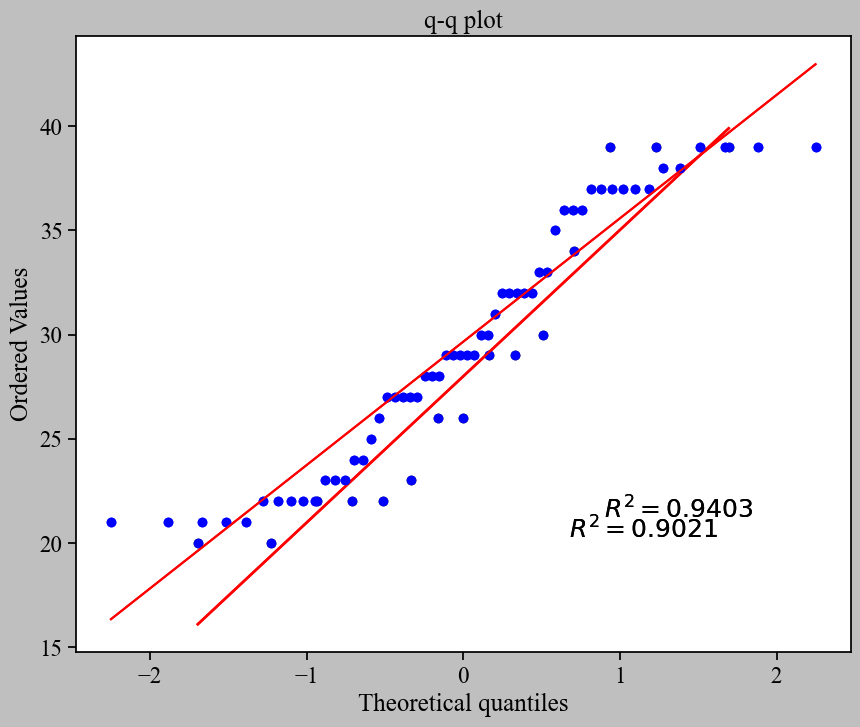

In [42]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'shapiro', vars = 'age', selector = {'sex' : 'male'}).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

*****
Note: 아래 조건에 부합하는 데이터에 한해서만 분석이 진행됩니다.
sex == male
*****

z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
all,15.0,0.594,0.58,1.023,-1.021,1.121,-0.91,1.96,정규성 가정 충족



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.
*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

*****
Note: 아래 조건에 부합하는 데이터에 한해서만 분석이 진행됩니다.
sex == male
*****

z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
all,56.0,0.075,0.319,0.234,-1.287,0.628,-2.048,2.59,정규성 가정 충족



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

*****
Note: Only data that meets the following conditions will be analyzed.
sex == male
*****

z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
all,15.0,0.594,0.58,1.023,-1.021,1.121,-0.91,1.96,The normality assumption is met.



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

*****
Note: Only data that meets the following conditions will be analyzed.
sex == male
*****

z-skeweness & z-kurtosis test


,n,skewness,SE of skewness,z-skewness,kurtosis,SE of kurtosis,z-kurtosis,cutoff,conclusion
set,,,,,,,,,
all,56.0,0.075,0.319,0.234,-1.287,0.628,-2.048,2.59,The normality assumption is met.



References:
[1] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: a guide for non-statisticians. International journal of endocrinology and metabolism, 10(2), 486. 
[2] Moon, S. (2019). Statistics for the Social Sciences: Moving Toward an Integrated Approach. Cognella Academic Publishing.


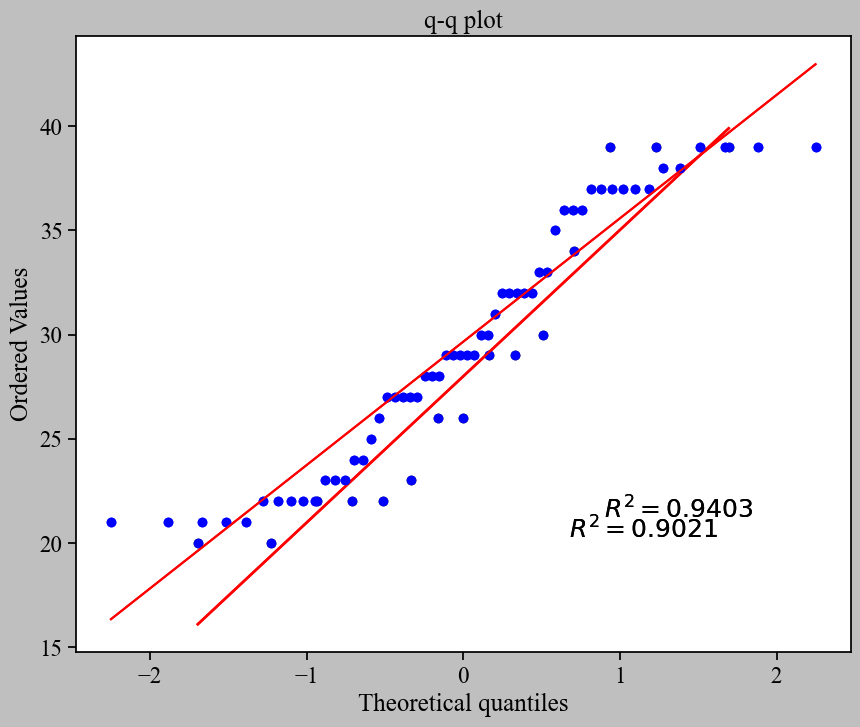

In [43]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'z_normal', vars = 'age', selector = {'sex' : 'male'}).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

집단변수 : condition
비교집단 : ['test_group' 'sham_group' 'control_group']
검정통계치 = 0.237, p = 0.791

결론: 등분산성 가정 충족
*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

집단변수 : condition
비교집단 : ['test_group' 'sham_group']
검정통계치 = 0.146, p = 0.703

결론: 등분산성 가정 충족
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Group variable : condition
Comparison groups : ['test_group' 'sham_group' 'control_group']
Test statistics = 0.237, p = 0.791

Conclusion : The homoskedasticity assumption is met
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Group variable : condition
Comparison groups : ['test_group' 'sham_group']
Test statistics = 0.146, p = 0.703

Conclusion : The homoskedasticity assumption is met


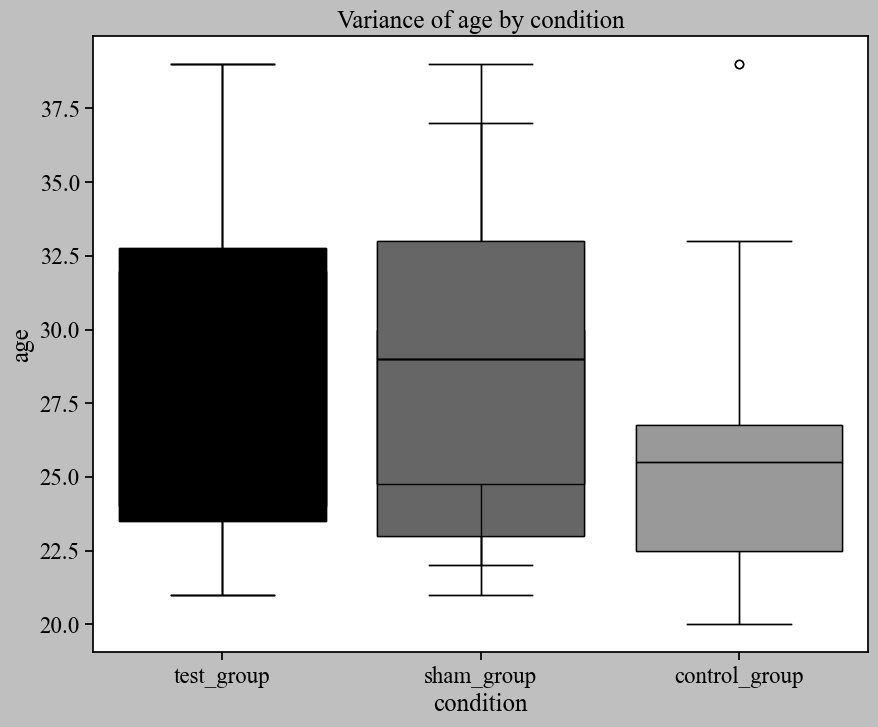

In [44]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'levene', vars = 'age', group_vars = 'condition').figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

F-max Test
변수: age
집단 변수: condition
집단 수 = 3
집단 구분 : ['test_group' 'sham_group' 'control_group']

집단 중 최대 분산 = 43.167
집단 중 최소 분산 = 30.900
F-max statistic = 1.397

결론: 등분산성 가정 충족

Reference:
[1] Fidell, L. S., & Tabachnick, B. G. (2003). Preparatory data analysis. Handbook of psychology: Research methods in psychology, 2, 115-141.

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

F-max Test
변수: age
집단 변수: condition
집단 수 = 2
집단 구분 : ['test_group' 'sham_group']

집단 중 최대 분산 = 36.395
집단 중 최소 분산 = 29.453
F-max statistic = 1.236

결론: 등분산성 가정 충족

Reference:
[1] Fidell, L. S., & Tabachnick, B. G. (2003). Preparatory data analysis. Handbook of psychology: Research methods in psychology, 2, 115-141.

*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

F-max Test
Variable: age
Group variable : condition
No. of groups = 3
Included groups : ['test_group' 'sham_group' 'control_group']

Max variance among groups = 43.

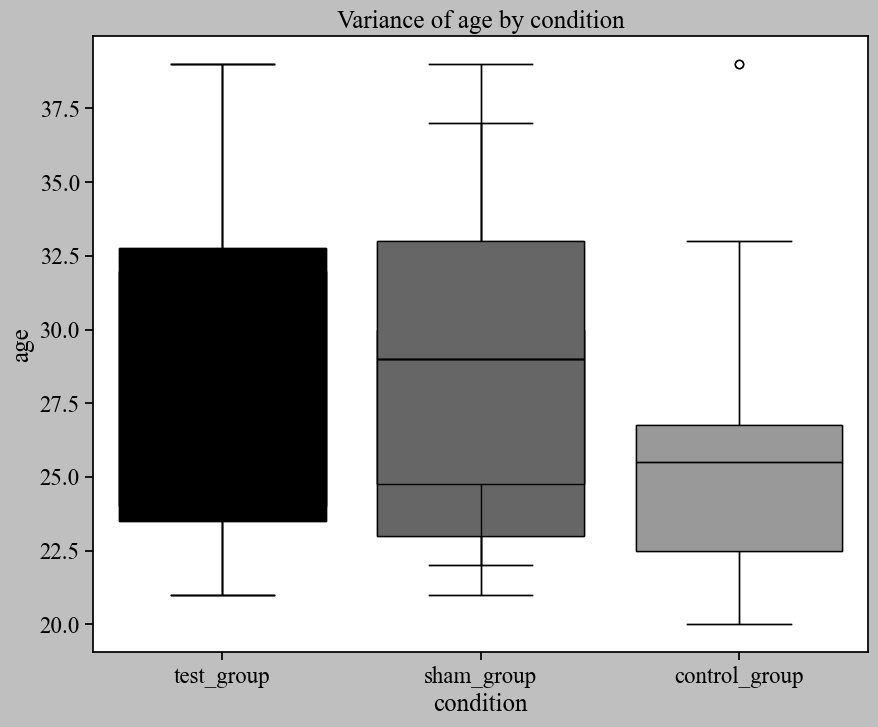

In [45]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'fmax', vars = 'age', group_vars = 'condition').figure()

In [46]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'chi2_contingency', vars = ['sex', 'condition']).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Chi-Squared Test
변수 : sex, condition

카이제곱 χ² = 0.000, p = 1.000, 자유도 = 2
분할표: 


,control_group,sham_group,test_group
sex,,,
female,5,5,5
male,5,5,5


기대빈도 분할표: 
기대빈도 5 미만의 cell이 차지하는 비율 = 0.00%



,control_group,sham_group,test_group
sex,,,
female,5.0,5.0,5.0
male,5.0,5.0,5.0


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Chi-Squared Test
변수 : sex, condition

카이제곱 χ² = 0.000, p = 1.000, 자유도 = 1
분할표: 


,sham_group,test_group
sex,,
female,25,19
male,31,25


기대빈도 분할표: 
기대빈도 5 미만의 cell이 차지하는 비율 = 0.00%



,sham_group,test_group
sex,,
female,24.64,19.36
male,31.36,24.64


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Chi-Squared Test
Variables : sex, condition

χ² = 0.000, p = 1.000, degree of freedom = 2
Contingency Table: 


,control_group,sham_group,test_group
sex,,,
female,5,5,5
male,5,5,5


Expected frequency contingency table: 
Percentage of cells with expected frequency less than 5 = 0.00%



,control_group,sham_group,test_group
sex,,,
female,5.0,5.0,5.0
male,5.0,5.0,5.0


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Chi-Squared Test
Variables : sex, condition

χ² = 0.000, p = 1.000, degree of freedom = 1
Contingency Table: 


,sham_group,test_group
sex,,
female,25,19
male,31,25


Expected frequency contingency table: 
Percentage of cells with expected frequency less than 5 = 0.00%



,sham_group,test_group
sex,,
female,24.64,19.36
male,31.36,24.64


In [47]:
for lang in langs:
    sm.set_language(lang).change_dataframe(df2).progress(method = 'FISHER', vars = ['sex', 'condition']).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Fisher's Exact Test
변수 : sex, condition

검정 통계치 = 1.061, p = 1.000
분할표: 


condition,sham_group,test_group
sex,,
female,25,19
male,31,25


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Fisher's Exact Test
Variables : sex, condition

Test Statistic = 1.061, p = 1.000
Contingency Table: 


condition,sham_group,test_group
sex,,
female,25,19
male,31,25


In [48]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'cronbach', vars = ['income', 'prescore', 'postscore']).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Calculating Cronbach's Alpha
Note: 입력된 모든 변수에서 결측값이 없는 데이터만 계산에 포함됩니다. 

n = 30
포함된 항목: income, prescore, postscore (3)

크론바흐의 알파 = -0.005

이러한 결과는 일반적이지 않으며, 포함된 항목 간 공분산이 음수이거나, 부적 상관관계를 이루고 있음을 반영하는 것일 수 있습니다.
계산에 포함된 항목에 대해 전반적으로 재검토할 것을 권고합니다. 
*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Calculating Cronbach's Alpha
Note: 입력된 모든 변수에서 결측값이 없는 데이터만 계산에 포함됩니다. 

n = 100
포함된 항목: income, prescore, postscore (3)

크론바흐의 알파 = -0.013

이러한 결과는 일반적이지 않으며, 포함된 항목 간 공분산이 음수이거나, 부적 상관관계를 이루고 있음을 반영하는 것일 수 있습니다.
계산에 포함된 항목에 대해 전반적으로 재검토할 것을 권고합니다. 
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Calculating Cronbach's Alpha
Note: Missing values are automatically deleted. 

n = 30
Included items: income, prescore, postscore (3)

Cronbach's alpha = -0.005

This result is not typical and may reflect negative covariance between the included items, or that they are corrleated in negative ways.
A general reex

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Correlation analysis: Pearson's r (Pearson correlation coefficient)
Max n = 30


,n,Pearson's r,p-value,95%_confidence_interval
set,,,,
income & prescore,30,-0.103,0.588,"[-0.447, 0.267]"
income & postscore,30,0.051,0.789,"[-0.315, 0.404]"
prescore & postscore,30,-0.021,0.914,"[-0.378, 0.342]"


,income,prescore,postscore
income,1.000,-0.103,0.051
prescore,-0.103,1.000,-0.021
postscore,0.051,-0.021,1.000


* p < .05
*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Correlation analysis: Pearson's r (Pearson correlation coefficient)
Max n = 100


,n,Pearson's r,p-value,95%_confidence_interval
set,,,,
income & prescore,100,-0.024,0.816,"[-0.219, 0.174]"
income & postscore,100,-0.080,0.429,"[-0.272, 0.118]"
prescore & postscore,100,-0.043,0.670,"[-0.238, 0.155]"


,income,prescore,postscore
income,1.000,-0.024,-0.080
prescore,-0.024,1.000,-0.043
postscore,-0.080,-0.043,1.000


* p < .05
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Correlation analysis: Pearson's r (Pearson correlation coefficient)
Max n = 30


,n,Pearson's r,p-value,95%_confidence_interval
set,,,,
income & prescore,30,-0.103,0.588,"[-0.447, 0.267]"
income & postscore,30,0.051,0.789,"[-0.315, 0.404]"
prescore & postscore,30,-0.021,0.914,"[-0.378, 0.342]"


,income,prescore,postscore
income,1.000,-0.103,0.051
prescore,-0.103,1.000,-0.021
postscore,0.051,-0.021,1.000


* p < .05
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Correlation analysis: Pearson's r (Pearson correlation coefficient)
Max n = 100


,n,Pearson's r,p-value,95%_confidence_interval
set,,,,
income & prescore,100,-0.024,0.816,"[-0.219, 0.174]"
income & postscore,100,-0.080,0.429,"[-0.272, 0.118]"
prescore & postscore,100,-0.043,0.670,"[-0.238, 0.155]"


,income,prescore,postscore
income,1.000,-0.024,-0.080
prescore,-0.024,1.000,-0.043
postscore,-0.080,-0.043,1.000


* p < .05


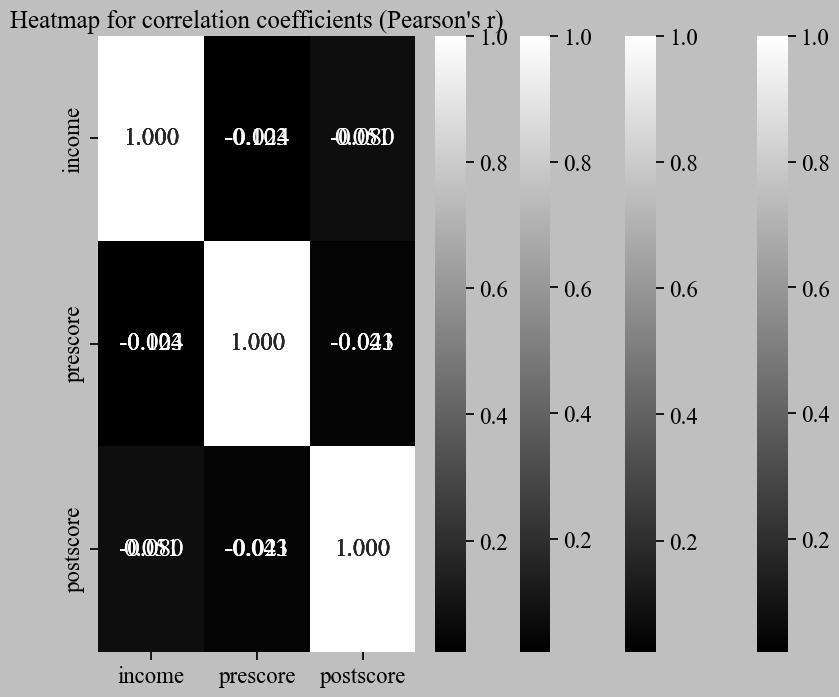

In [49]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'pearsonr', vars = ['income', 'prescore', 'postscore']).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Correlation analysis: Spearman's rho (Spearman's rank correlation coefficient)
Max n = 30


,n,Spearman's rho,p-value
set,,,
income & prescore,30,-0.138,0.468
income & postscore,30,0.046,0.808
prescore & postscore,30,-0.028,0.882


,income,prescore,postscore
income,1.000,-0.138,0.046
prescore,-0.138,1.000,-0.028
postscore,0.046,-0.028,1.000


* p < .05
*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Correlation analysis: Spearman's rho (Spearman's rank correlation coefficient)
Max n = 100


,n,Spearman's rho,p-value
set,,,
income & prescore,100,-0.009,0.927
income & postscore,100,-0.073,0.467
prescore & postscore,100,-0.043,0.671


,income,prescore,postscore
income,1.000,-0.009,-0.073
prescore,-0.009,1.000,-0.043
postscore,-0.073,-0.043,1.000


* p < .05
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Correlation analysis: Spearman's rho (Spearman's rank correlation coefficient)
Max n = 30


,n,Spearman's rho,p-value
set,,,
income & prescore,30,-0.138,0.468
income & postscore,30,0.046,0.808
prescore & postscore,30,-0.028,0.882


,income,prescore,postscore
income,1.000,-0.138,0.046
prescore,-0.138,1.000,-0.028
postscore,0.046,-0.028,1.000


* p < .05
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Correlation analysis: Spearman's rho (Spearman's rank correlation coefficient)
Max n = 100


,n,Spearman's rho,p-value
set,,,
income & prescore,100,-0.009,0.927
income & postscore,100,-0.073,0.467
prescore & postscore,100,-0.043,0.671


,income,prescore,postscore
income,1.000,-0.009,-0.073
prescore,-0.009,1.000,-0.043
postscore,-0.073,-0.043,1.000


* p < .05


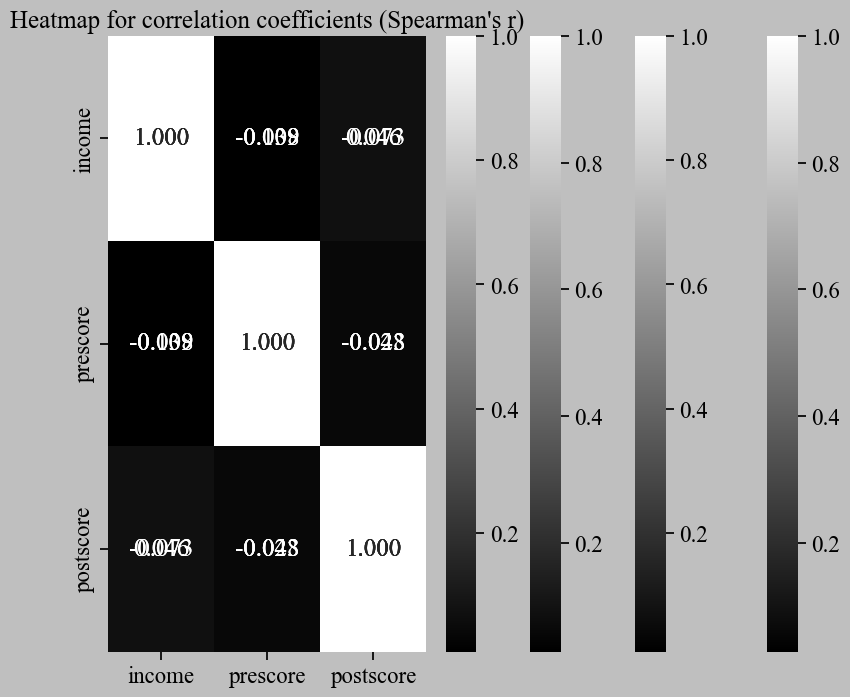

In [50]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'spearmanr', vars = ['income', 'prescore', 'postscore']).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Correlation analysis: Kendall's tau (Kendall's tau correlation coefficient)
Max n = 30


,n,Kendall's tau,p-value
set,,,
income & prescore,30,-0.106,0.428
income & postscore,30,0.019,0.886
prescore & postscore,30,0.010,0.942


,income,prescore,postscore
income,1.000,-0.106,0.019
prescore,-0.106,1.000,0.010
postscore,0.019,0.010,1.000


* p < .05
*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Correlation analysis: Kendall's tau (Kendall's tau correlation coefficient)
Max n = 100


,n,Kendall's tau,p-value
set,,,
income & prescore,100,-0.006,0.931
income & postscore,100,-0.051,0.467
prescore & postscore,100,-0.036,0.621


,income,prescore,postscore
income,1.000,-0.006,-0.051
prescore,-0.006,1.000,-0.036
postscore,-0.051,-0.036,1.000


* p < .05
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Correlation analysis: Kendall's tau (Kendall's tau correlation coefficient)
Max n = 30


,n,Kendall's tau,p-value
set,,,
income & prescore,30,-0.106,0.428
income & postscore,30,0.019,0.886
prescore & postscore,30,0.010,0.942


,income,prescore,postscore
income,1.000,-0.106,0.019
prescore,-0.106,1.000,0.010
postscore,0.019,0.010,1.000


* p < .05
*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Correlation analysis: Kendall's tau (Kendall's tau correlation coefficient)
Max n = 100


,n,Kendall's tau,p-value
set,,,
income & prescore,100,-0.006,0.931
income & postscore,100,-0.051,0.467
prescore & postscore,100,-0.036,0.621


,income,prescore,postscore
income,1.000,-0.006,-0.051
prescore,-0.006,1.000,-0.036
postscore,-0.051,-0.036,1.000


* p < .05


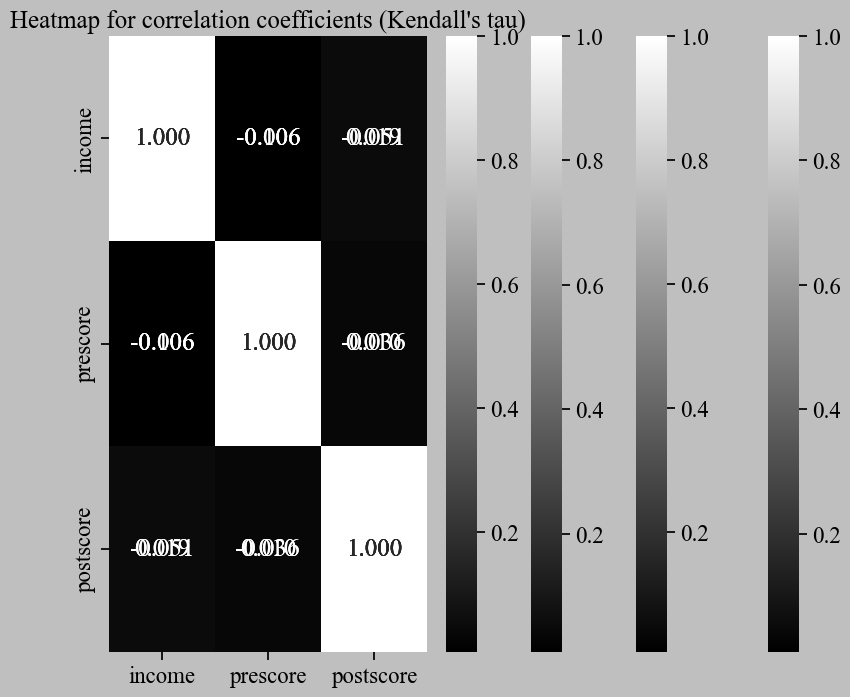

In [51]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'kendallt', vars = ['income', 'prescore', 'postscore']).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Indenpendent Samples T-test
변수 : age
집단변수 : sex
비교집단 : ['female' 'male']
기술통계치: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,t-value,degree of freedom,p-value,95% CI,Cohen'd
dependent variable,,,,,
age,-0.304,28.0,0.763,"[-5.153, 3.820]",-0.111


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Indenpendent Samples T-test
변수 : age
집단변수 : sex
비교집단 : ['male' 'female']
기술통계치: 


,female,male
n,44.000,56.000
mean,28.091,29.661
median,26.500,29.000
std,5.207,5.967
min,21.000,21.000
max,39.000,39.000


,t-value,degree of freedom,p-value,95% CI,Cohen'd
dependent variable,,,,,
age,1.38,98.0,0.171,"[-0.687, 3.827]",0.278


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Indenpendent Samples T-test
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,t-value,degree of freedom,p-value,95% CI,Cohen'd
dependent variable,,,,,
age,-0.304,28.0,0.763,"[-5.153, 3.820]",-0.111


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Indenpendent Samples T-test
Variable : age
Group variable : sex
Comparison group : ['male' 'female']
Decriptive analysis: 


,female,male
n,44.000,56.000
mean,28.091,29.661
median,26.500,29.000
std,5.207,5.967
min,21.000,21.000
max,39.000,39.000


,t-value,degree of freedom,p-value,95% CI,Cohen'd
dependent variable,,,,,
age,1.38,98.0,0.171,"[-0.687, 3.827]",0.278


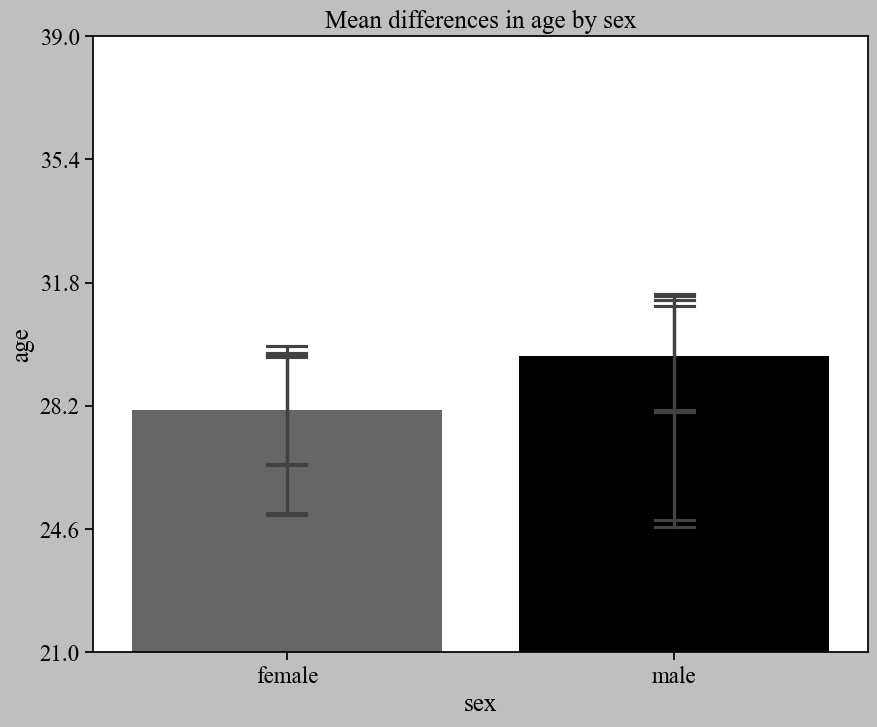

In [52]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'ttest_ind', vars = 'age', group_vars = 'sex').figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Mann-Whitney U Test (Wilcoxon Rank Sum Test)
변수 : age
집단변수 : sex
비교집단 : ['female' 'male']
기술통계치: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,U-value,Z-value,p-value,Rank-biserial Correlation
dependent variable,,,,
age,112.0,-0.021,1.0,0.004


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Mann-Whitney U Test (Wilcoxon Rank Sum Test)
변수 : age
집단변수 : sex
비교집단 : ['male' 'female']
기술통계치: 


,female,male
n,44.000,56.000
mean,28.091,29.661
median,26.500,29.000
std,5.207,5.967
min,21.000,21.000
max,39.000,39.000


,U-value,Z-value,p-value,Rank-biserial Correlation
dependent variable,,,,
age,1430.5,1.378,0.168,-0.161


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Mann-Whitney U Test (Wilcoxon Rank Sum Test)
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,U-value,Z-value,p-value,Rank-biserial Correlation
dependent variable,,,,
age,112.0,-0.021,1.0,0.004


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Mann-Whitney U Test (Wilcoxon Rank Sum Test)
Variable : age
Group variable : sex
Comparison group : ['male' 'female']
Decriptive analysis: 


,female,male
n,44.000,56.000
mean,28.091,29.661
median,26.500,29.000
std,5.207,5.967
min,21.000,21.000
max,39.000,39.000


,U-value,Z-value,p-value,Rank-biserial Correlation
dependent variable,,,,
age,1430.5,1.378,0.168,-0.161


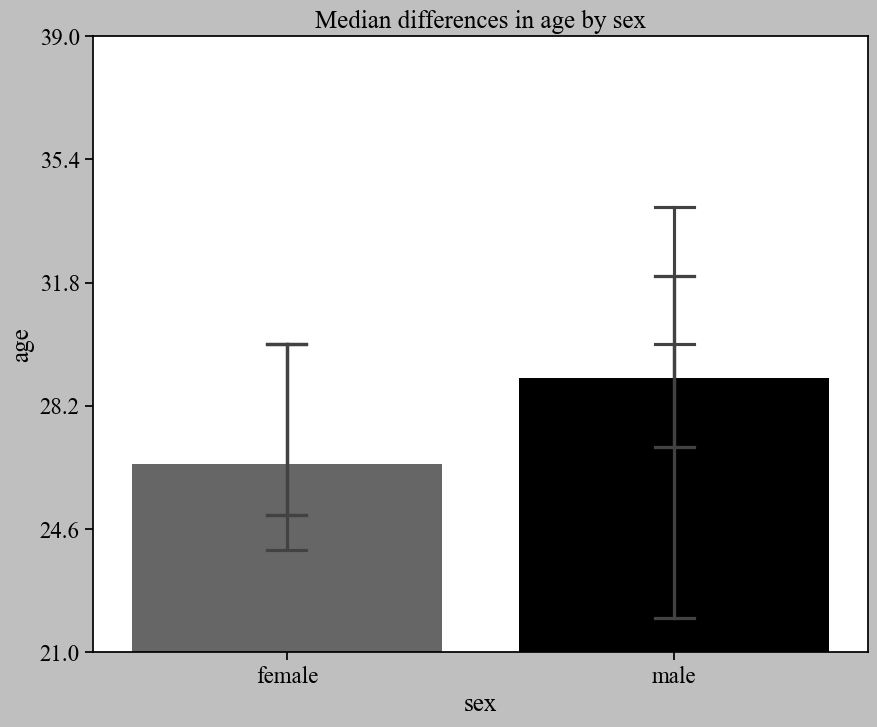

In [53]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'mannwhitneyu', vars = 'age', group_vars = 'sex').figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Brunner-Munzel Test
변수 : age
집단변수 : sex
비교집단 : ['female' 'male']
기술통계치: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,W-value,p-value
dependent variable,,
age,0.02,0.984


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Brunner-Munzel Test
변수 : age
집단변수 : sex
비교집단 : ['male' 'female']
기술통계치: 


,female,male
n,44.000,56.000
mean,28.091,29.661
median,26.500,29.000
std,5.207,5.967
min,21.000,21.000
max,39.000,39.000


,W-value,p-value
dependent variable,,
age,-1.4,0.165


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Brunner-Munzel Test
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,W-value,p-value
dependent variable,,
age,0.02,0.984


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Brunner-Munzel Test
Variable : age
Group variable : sex
Comparison group : ['male' 'female']
Decriptive analysis: 


,female,male
n,44.000,56.000
mean,28.091,29.661
median,26.500,29.000
std,5.207,5.967
min,21.000,21.000
max,39.000,39.000


,W-value,p-value
dependent variable,,
age,-1.4,0.165


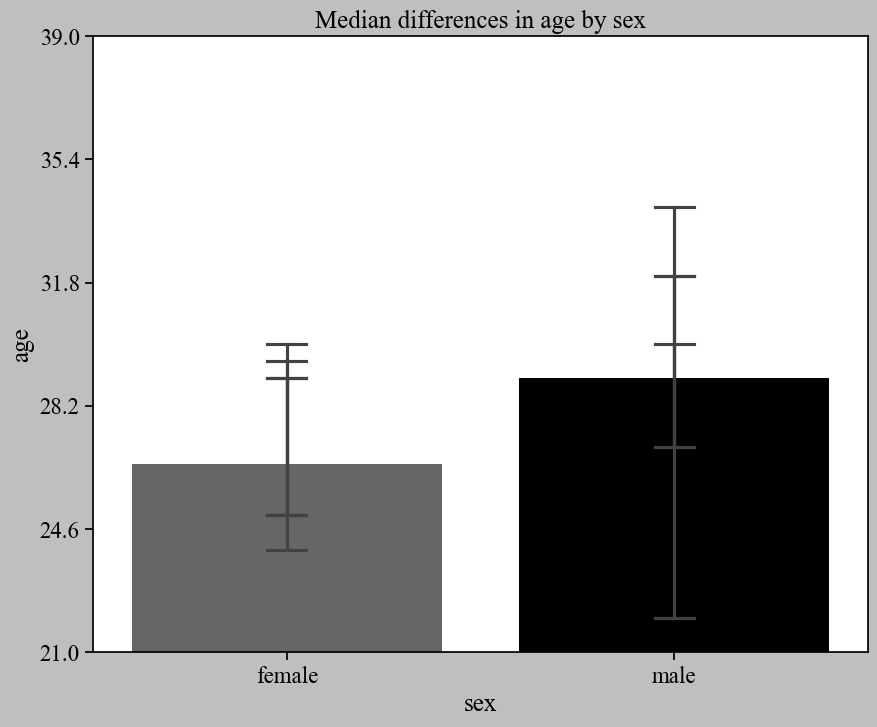

In [54]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'brunner', vars = 'age', group_vars = 'sex').figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Dependent Samples T-test
변수 : prescore, postscore
n = 30
기술통계치: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",1.198,29.0,0.24,"[-0.636, 2.436]",0.313


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Dependent Samples T-test
변수 : prescore, postscore
n = 100
기술통계치: 



,prescore,postscore
n,100.000,100.000
mean,5.120,4.970
median,5.000,5.000
std,3.128,3.189
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",0.329,99.0,0.743,"[-0.755, 1.055]",0.047


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Dependent Samples T-test
Variables : prescore, postscore
n = 30
Descriptive analysis: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",1.198,29.0,0.24,"[-0.636, 2.436]",0.313


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Dependent Samples T-test
Variables : prescore, postscore
n = 100
Descriptive analysis: 



,prescore,postscore
n,100.000,100.000
mean,5.120,4.970
median,5.000,5.000
std,3.128,3.189
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",0.329,99.0,0.743,"[-0.755, 1.055]",0.047


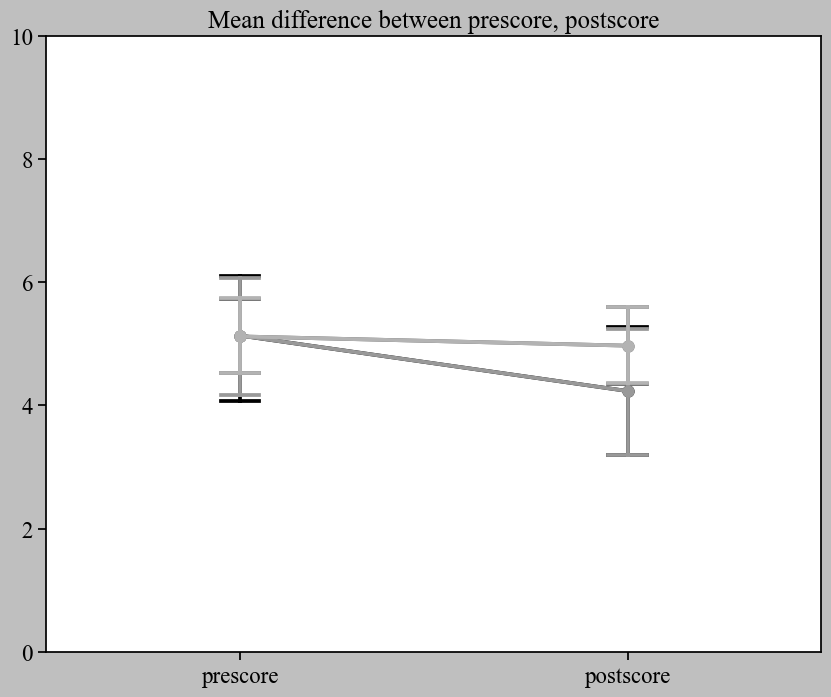

In [55]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'ttest_rel', vars = ['prescore', 'postscore']).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Wilcoxon-Signed Rank Test
변수 : prescore, postscore
n = 30
기술통계치: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,Test-Statistic,Z-value,p-value,Rank-biserial correlation
variables,,,,
"['prescore', 'postscore']",144.0,-1.35,0.177,-0.247


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Wilcoxon-Signed Rank Test
변수 : prescore, postscore
n = 100
기술통계치: 



,prescore,postscore
n,100.000,100.000
mean,5.120,4.970
median,5.000,5.000
std,3.128,3.189
min,0.000,0.000
max,10.000,10.000


,Test-Statistic,Z-value,p-value,Rank-biserial correlation
variables,,,,
"['prescore', 'postscore']",1934.0,-0.281,0.779,-0.028


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Wilcoxon-Signed Rank Test
Variables : prescore, postscore
n = 30
Descriptive analysis: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,Test-Statistic,Z-value,p-value,Rank-biserial correlation
variables,,,,
"['prescore', 'postscore']",144.0,-1.35,0.177,-0.247


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Wilcoxon-Signed Rank Test
Variables : prescore, postscore
n = 100
Descriptive analysis: 



,prescore,postscore
n,100.000,100.000
mean,5.120,4.970
median,5.000,5.000
std,3.128,3.189
min,0.000,0.000
max,10.000,10.000


,Test-Statistic,Z-value,p-value,Rank-biserial correlation
variables,,,,
"['prescore', 'postscore']",1934.0,-0.281,0.779,-0.028


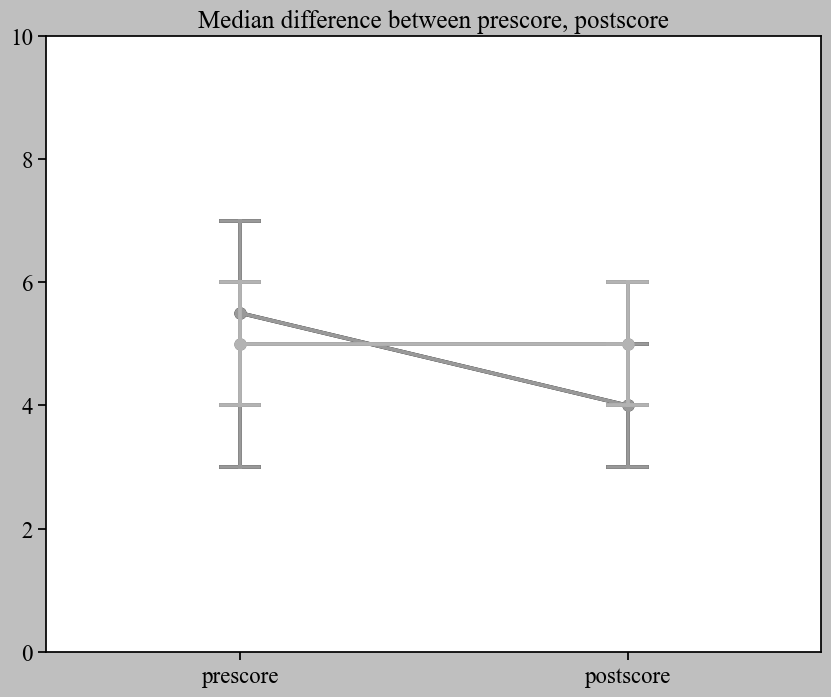

In [56]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'wilcoxon', vars = ['prescore', 'postscore']).figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Bootstrap percentile method: Resampling No. = 1000 

prescore 의 95% 신뢰구간 = [4.100, 6.167]
postscore 의 95% 신뢰구간 = [3.267, 5.267]

두 분포의 신뢰구간이 중복됩니다. 
두 분포 간 차이가 유의하지 않습니다.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



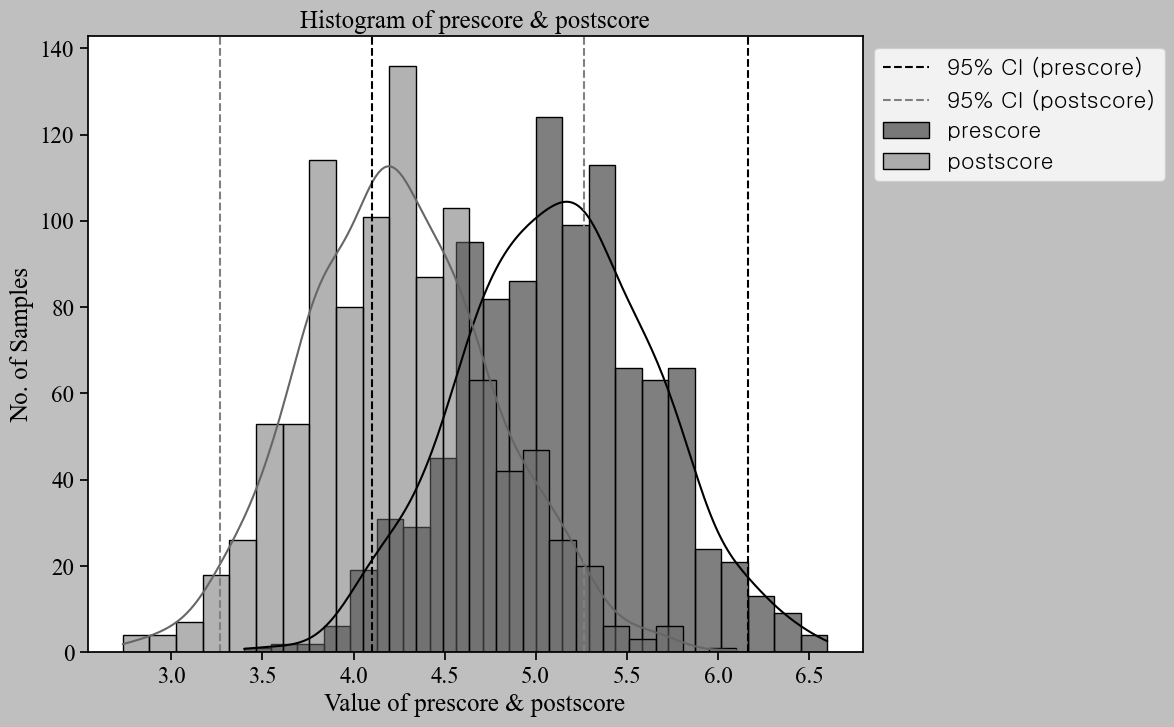

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Bootstrap percentile method: Resampling No. = 1000 

prescore 의 95% 신뢰구간 = [4.490, 5.740]
postscore 의 95% 신뢰구간 = [4.360, 5.560]

두 분포의 신뢰구간이 중복됩니다. 
두 분포 간 차이가 유의하지 않습니다.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



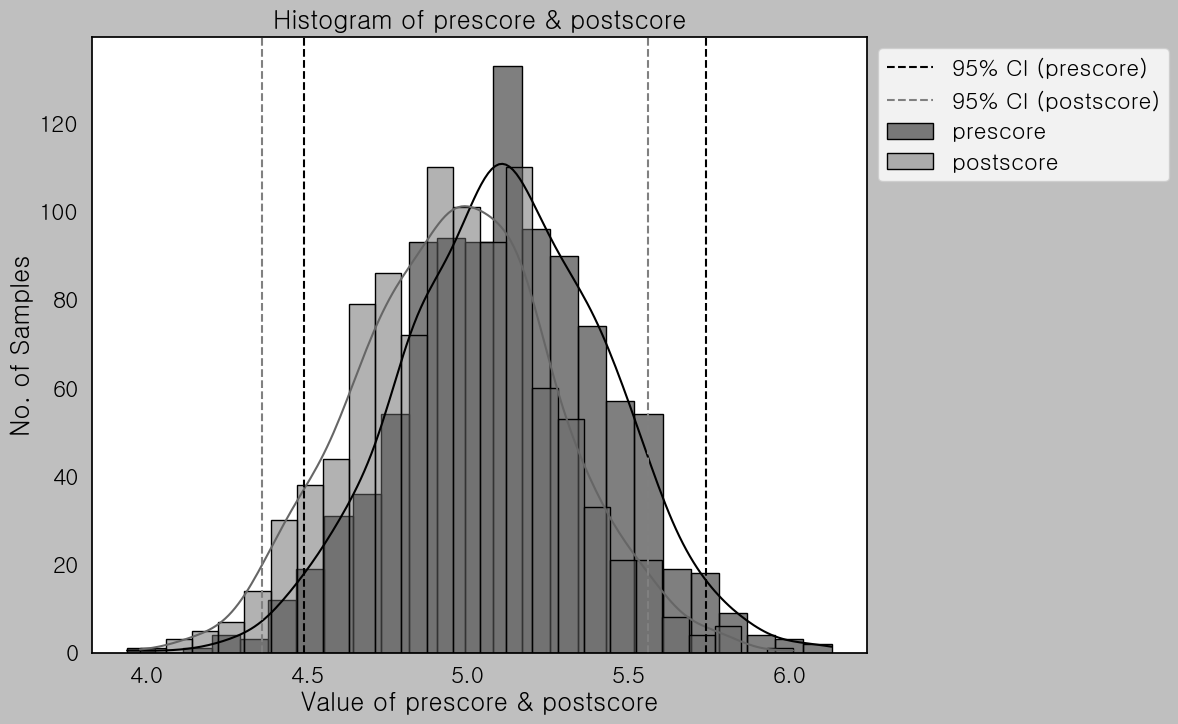

*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Bootstrap percentile method: Resampling No. = 1000 

95% confidence interval of prescore = [4.167, 6.200]
95% confidence interval of postscore = [3.167, 5.233]

The confidence intervals for the two distributions overlap. Therefore, the difference between the two distributions is not significant.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



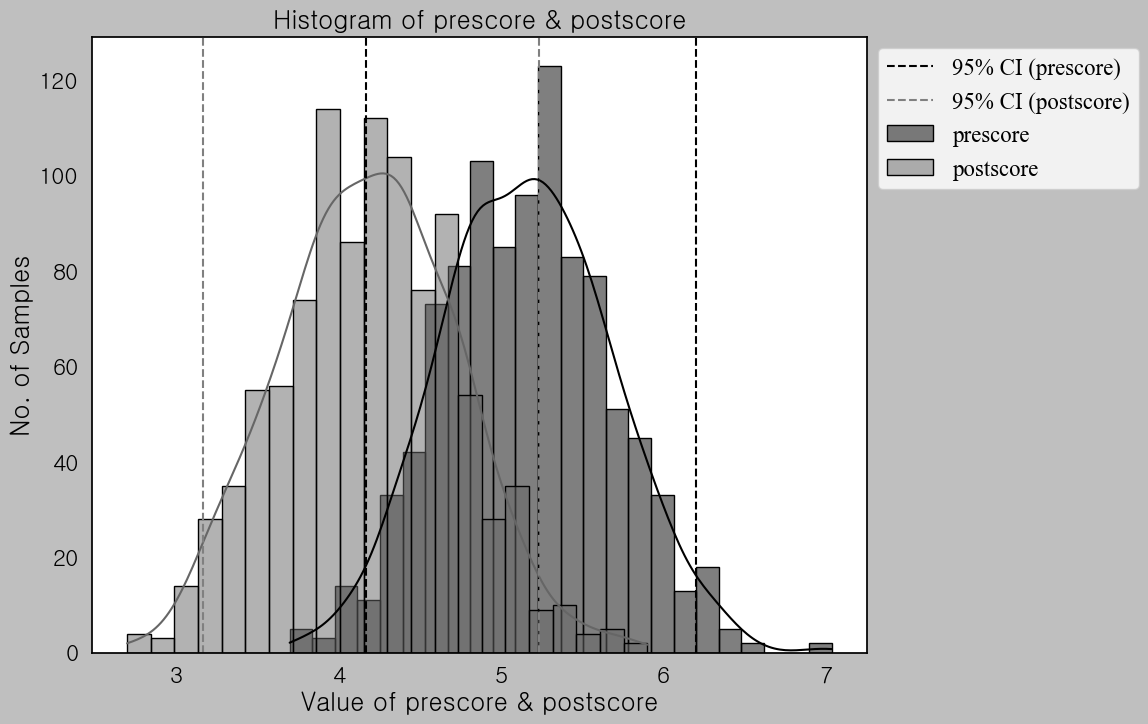

*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Bootstrap percentile method: Resampling No. = 1000 

95% confidence interval of prescore = [4.500, 5.750]
95% confidence interval of postscore = [4.370, 5.570]

The confidence intervals for the two distributions overlap. Therefore, the difference between the two distributions is not significant.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



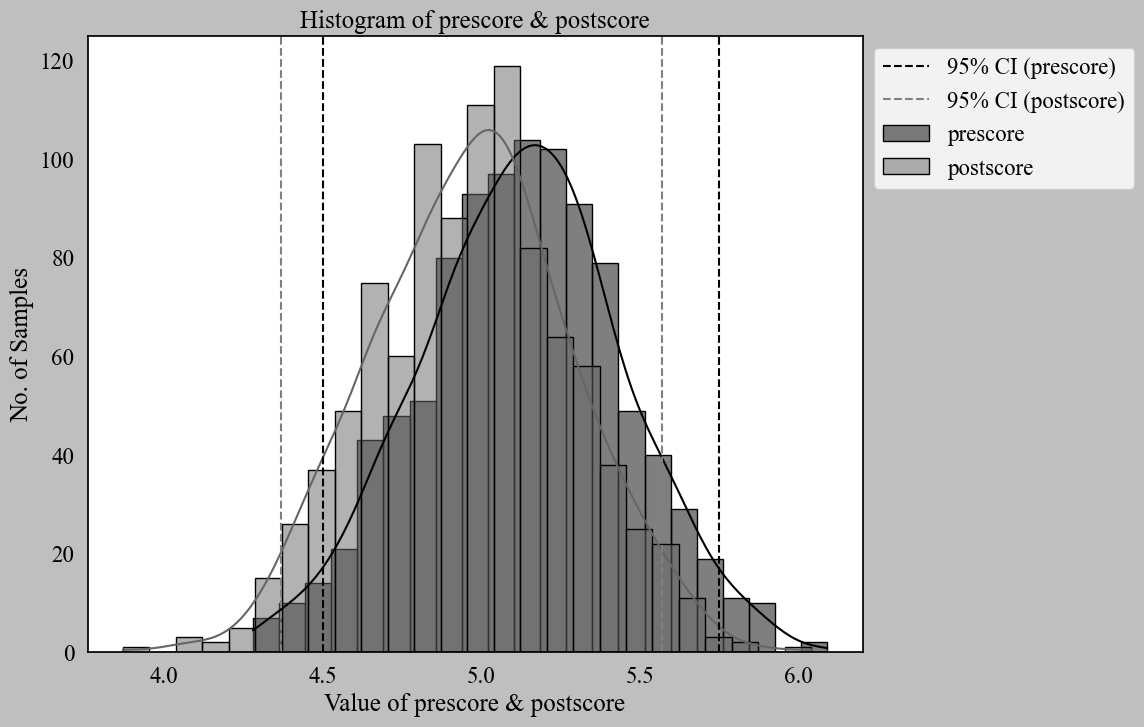

In [57]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'bootstrap1000', vars = ['prescore', 'postscore'])

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Bootstrap percentile method: Resampling No. = 1000 

female_age 의 95% 신뢰구간 = [25.133, 29.735]
male_age 의 95% 신뢰구간 = [25.000, 31.267]

두 분포의 신뢰구간이 중복됩니다. 
두 분포 간 차이가 유의하지 않습니다.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



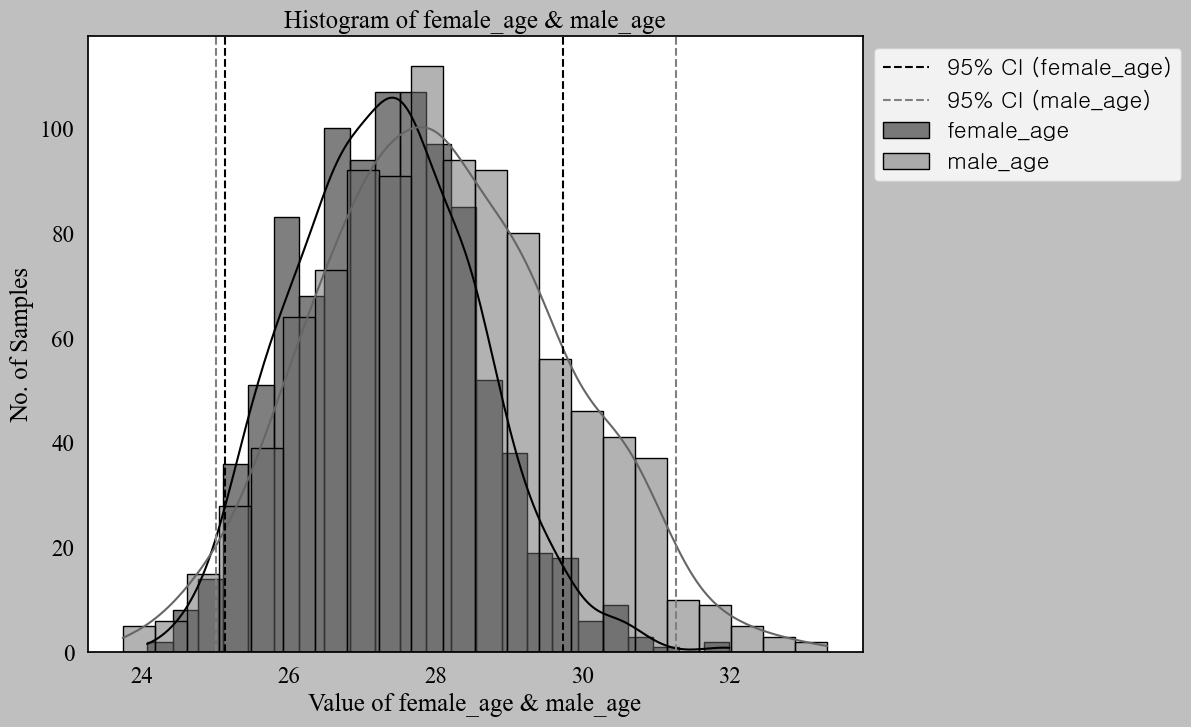

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Bootstrap percentile method: Resampling No. = 1000 

male_age 의 95% 신뢰구간 = [28.196, 31.233]
female_age 의 95% 신뢰구간 = [26.568, 29.660]

두 분포의 신뢰구간이 중복됩니다. 
두 분포 간 차이가 유의하지 않습니다.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



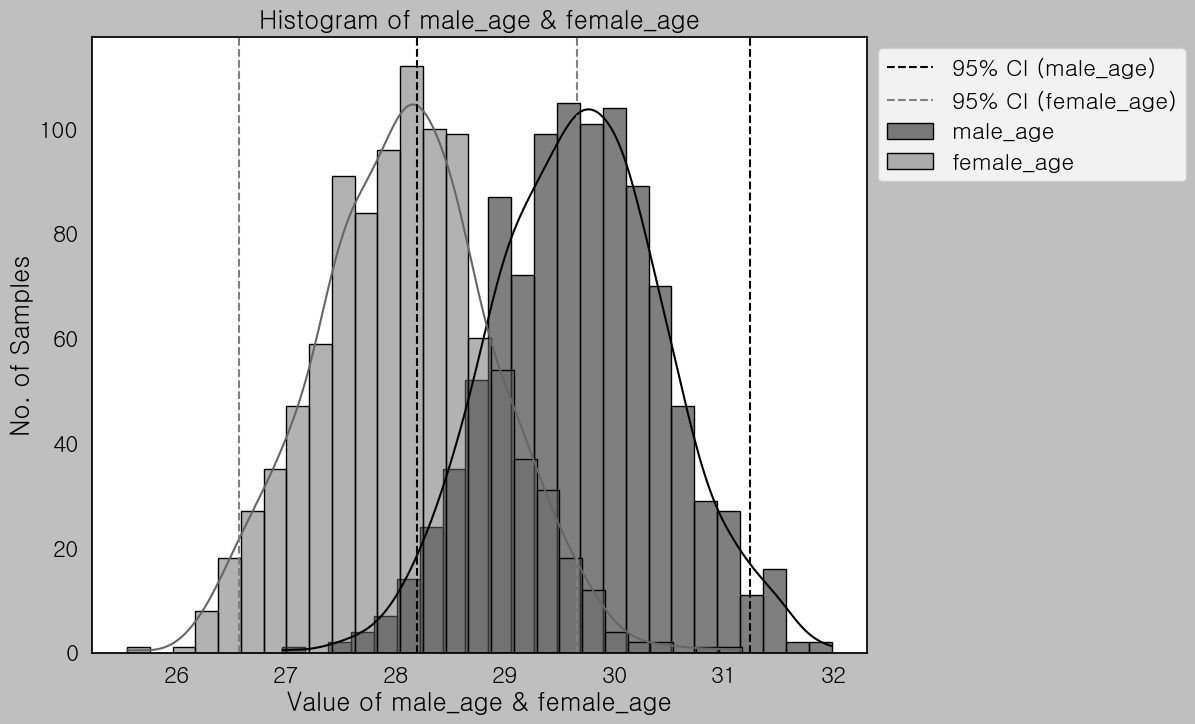

*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Bootstrap percentile method: Resampling No. = 1000 

95% confidence interval of female_age = [25.000, 29.867]
95% confidence interval of male_age = [24.798, 31.467]

The confidence intervals for the two distributions overlap. Therefore, the difference between the two distributions is not significant.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



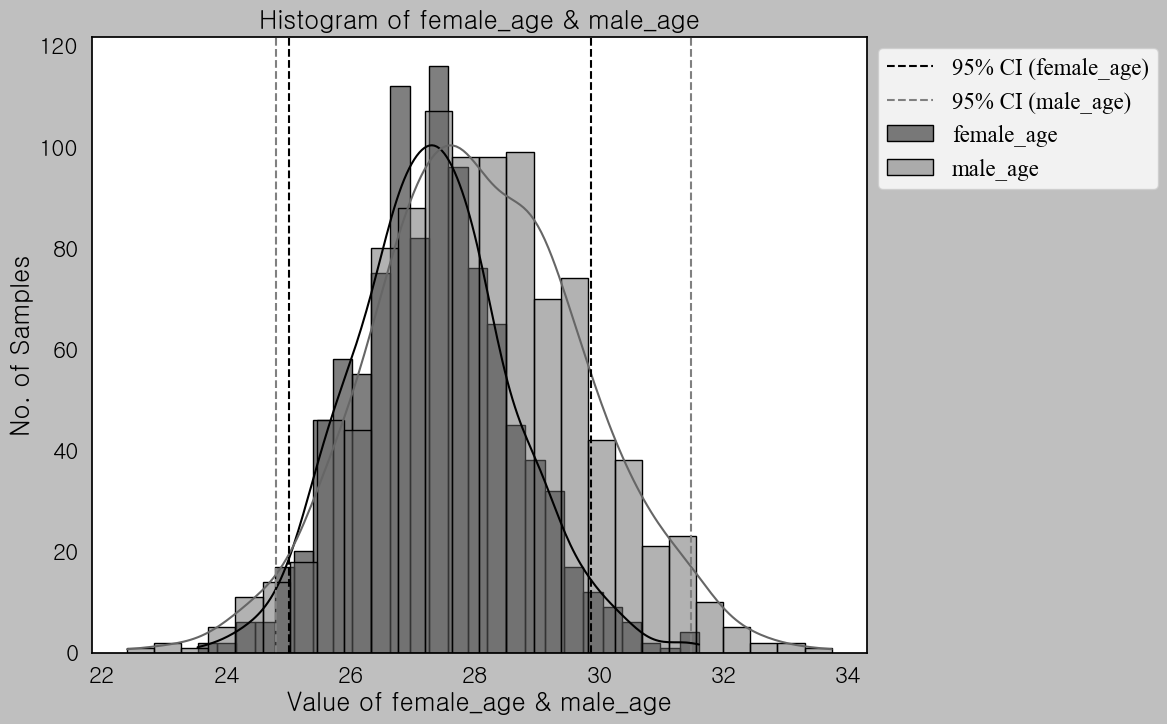

*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

Bootstrap percentile method: Resampling No. = 1000 

95% confidence interval of male_age = [28.232, 31.233]
95% confidence interval of female_age = [26.636, 29.636]

The confidence intervals for the two distributions overlap. Therefore, the difference between the two distributions is not significant.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



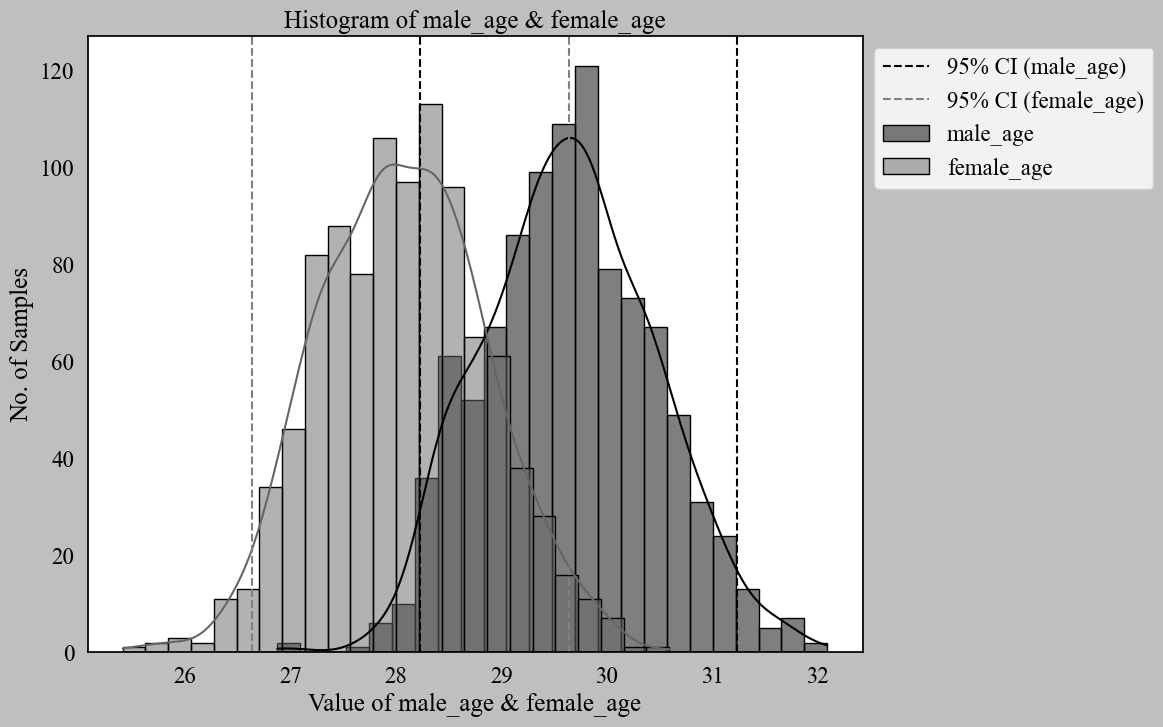

In [58]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'bootstrap1000', vars = 'age', group_vars = 'sex')

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

One-way ANOVA
변수 : age
집단변수 : condition
비교집단 : ['test_group' 'sham_group' 'control_group']
기술통계치: 


,control_group,sham_group,test_group
n,10.000,10.000,10.00
mean,26.200,28.300,28.50
median,25.500,29.000,27.00
std,5.884,5.559,6.57
min,20.000,22.000,21.00
max,39.000,39.000,39.00


,sum_sq,df,F,p-value,partial eta squared
Intercept,6864.400,1.0,189.469,0.000,0.872
C(condition),32.467,2.0,0.448,0.644,0.004
Residual,978.200,27.0,NaN,NaN,0.124


Posthoc: 


group1,group2,meandiff,p-adj,lower,upper,reject
control_group,sham_group,2.1,0.7182,-4.5742,8.7742,False
control_group,test_group,2.3,0.673,-4.3742,8.9742,False
sham_group,test_group,0.2,0.997,-6.4742,6.8742,False


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

One-way ANOVA
변수 : age
집단변수 : condition
비교집단 : ['test_group' 'sham_group']
기술통계치: 


,sham_group,test_group
n,56.000,44.000
mean,28.964,28.977
median,29.000,27.000
std,5.427,6.033
min,21.000,21.000
max,37.000,39.000


,sum_sq,df,F,p-value,partial eta squared
Intercept,46980.071,1.0,1445.583,0.000,0.937
C(condition),0.004,1.0,0.000,0.991,0.000
Residual,3184.906,98.0,NaN,NaN,0.063


Posthoc: 


group1,group2,meandiff,p-adj,lower,upper,reject
sham_group,test_group,0.013,0.991,-2.2661,2.2921,False


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

One-way ANOVA
Variable : age
Group variable : condition
Comparison group : ['test_group' 'sham_group' 'control_group']
Decriptive analysis: 


,control_group,sham_group,test_group
n,10.000,10.000,10.00
mean,26.200,28.300,28.50
median,25.500,29.000,27.00
std,5.884,5.559,6.57
min,20.000,22.000,21.00
max,39.000,39.000,39.00


,sum_sq,df,F,p-value,partial eta squared
Intercept,6864.400,1.0,189.469,0.000,0.872
C(condition),32.467,2.0,0.448,0.644,0.004
Residual,978.200,27.0,NaN,NaN,0.124


Posthoc: 


group1,group2,meandiff,p-adj,lower,upper,reject
control_group,sham_group,2.1,0.7182,-4.5742,8.7742,False
control_group,test_group,2.3,0.673,-4.3742,8.9742,False
sham_group,test_group,0.2,0.997,-6.4742,6.8742,False


*****
The Language is set to ENGLISH.
*****

Dataframe change was successful. 

One-way ANOVA
Variable : age
Group variable : condition
Comparison group : ['test_group' 'sham_group']
Decriptive analysis: 


,sham_group,test_group
n,56.000,44.000
mean,28.964,28.977
median,29.000,27.000
std,5.427,6.033
min,21.000,21.000
max,37.000,39.000


,sum_sq,df,F,p-value,partial eta squared
Intercept,46980.071,1.0,1445.583,0.000,0.937
C(condition),0.004,1.0,0.000,0.991,0.000
Residual,3184.906,98.0,NaN,NaN,0.063


Posthoc: 


group1,group2,meandiff,p-adj,lower,upper,reject
sham_group,test_group,0.013,0.991,-2.2661,2.2921,False


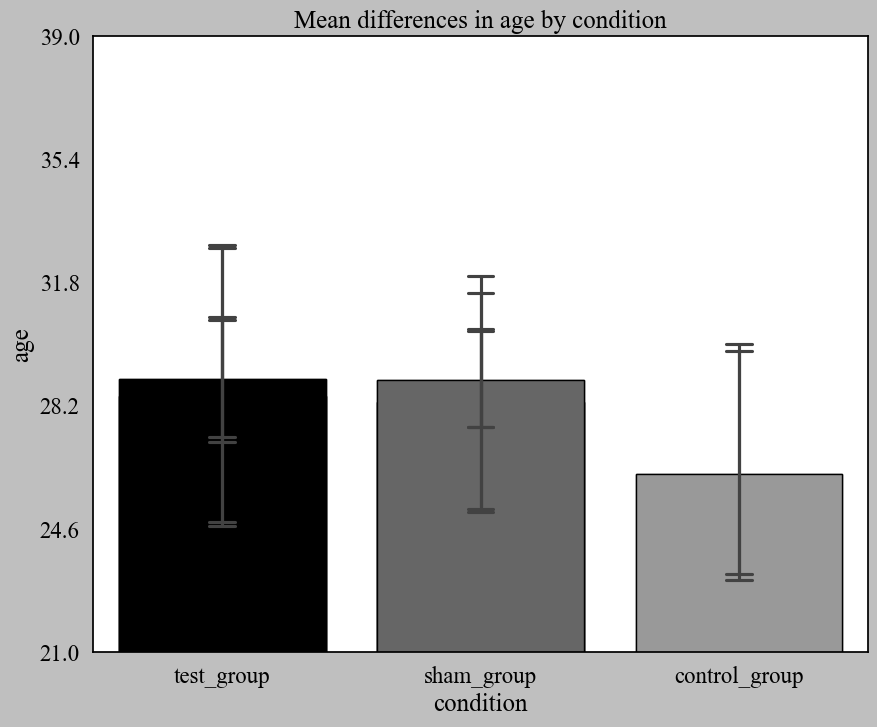

In [59]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'f_oneway', vars = 'age', group_vars = 'condition', posthoc = True, posthoc_method ='tukey').figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

One-way Repeated Measures ANOVA
변수: ['prescore', 'postscore', 'fupscore'], 시점 = 3
변수별 기술통계치: 



,prescore,postscore,fupscore
n,30.000,30.000,30.000
mean,5.133,4.233,4.367
median,5.500,4.000,4.000
std,2.849,2.909,2.619
min,0.000,0.000,1.000
max,10.000,10.000,9.000


,F Value,Num DF,Den DF,p-value,partial eta squared
variable,1.079,2.0,58.0,0.347,0.02


Posthoc: 


group1,group2,meandiff,p-adj,lower,upper,reject
fupscore,postscore,-0.1333,0.9814,-1.8543,1.5877,False
fupscore,prescore,0.7667,0.54,-0.9543,2.4877,False
postscore,prescore,0.9,0.429,-0.821,2.621,False


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.



KeyError: ['fupscore']

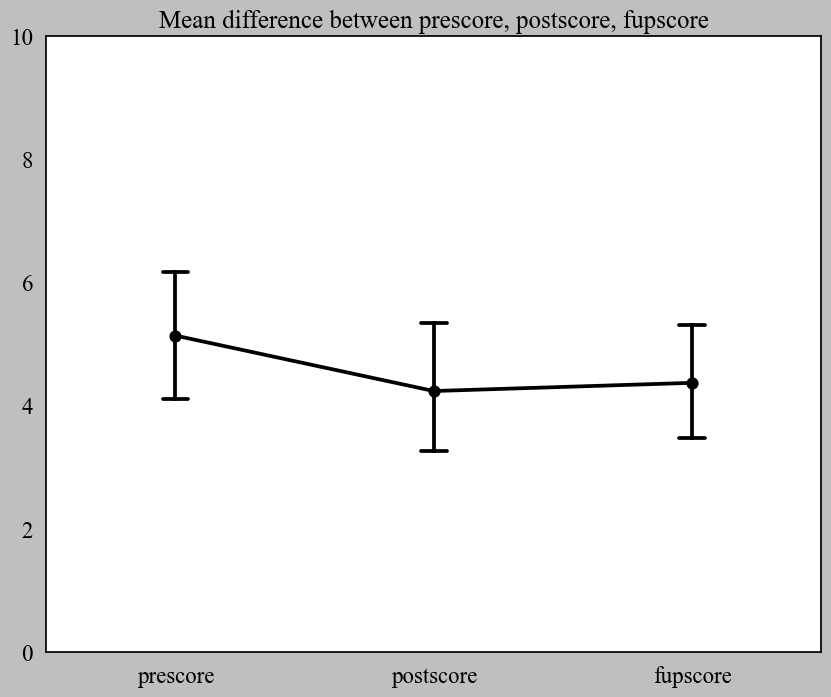

In [60]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'f_oneway_rm', vars = ['prescore', 'postscore', 'fupscore'], posthoc = True, posthoc_method ='tukey').figure()

*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.

Friedman Test
변수: ['prescore', 'postscore', 'fupscore'], 시점 = 3
변수별 기술통계치: 



,prescore,postscore,fupscore
n,30.000,30.000,30.000
mean,5.133,4.233,4.367
median,5.500,4.000,4.000
std,2.849,2.909,2.619
min,0.000,0.000,1.000
max,10.000,10.000,9.000


,correcting for ties,p-value
variables,,
"['prescore', 'postscore', 'fupscore']",3.911,0.142


Posthoc: 


group1,group2,meandiff,p-adj,lower,upper,reject
fupscore,postscore,-0.1333,0.9814,-1.8543,1.5877,False
fupscore,prescore,0.7667,0.54,-0.9543,2.4877,False
postscore,prescore,0.9,0.429,-0.821,2.621,False


*****
언어 설정이 한글로 변경되었습니다.
*****

데이터프레임 변경에 성공했습니다.



KeyError: ['fupscore']

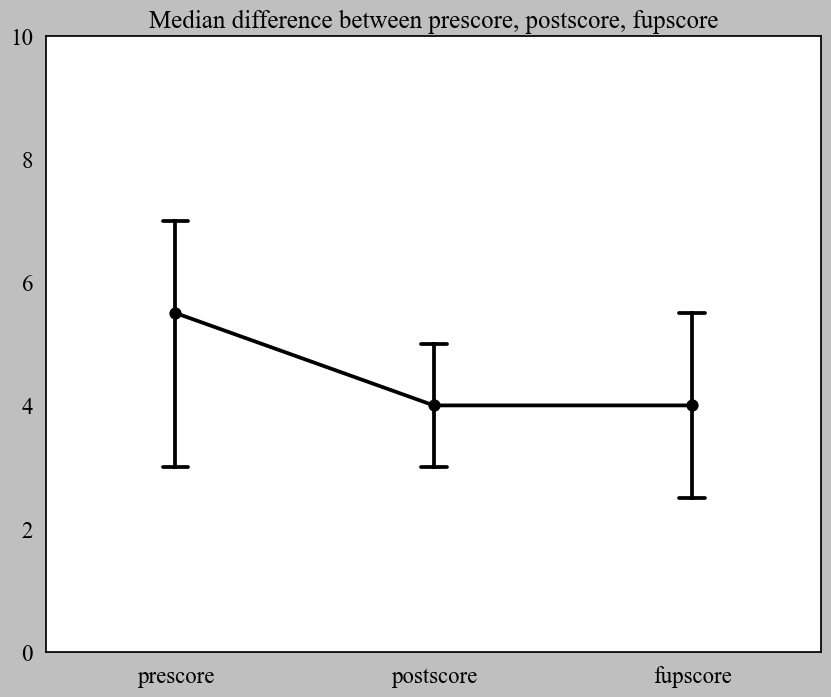

In [64]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'friedman', vars = ['prescore', 'postscore', 'fupscore'], posthoc = True, posthoc_method ='tukey').figure()

In [ ]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'f_nway', vars = 'income', group_vars = ['condition', 'sex'], posthoc = True).figure()

In [ ]:
for lang in langs:
    sm.change_dataframe(df).set_language(lang).progress(method = 'f_nway_rm', vars = ['prescore', 'postscore', 'fupscore'], group_vars = 'sex', posthoc = True, selector = {'income' : {">" : 0}}).figure()

In [ ]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'linearr', vars = ['postscore', ['age', 'income', 'prescore', 'sex']]).figure()

In [ ]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'logisticr', vars = ['sex', ['income', 'prescore', 'postscore', 'condition']]).figure()

In [ ]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'oneway_ancova', vars = ['income', ['age']], group_vars = 'condition', posthoc = True).figure()

In [ ]:
for lang in langs:
    for d in dfs:
        sm.set_language(lang).change_dataframe(d).progress(method = 'rm_ancova', vars = ['prescore', 'postscore', 'fupscore', ['income']],posthoc = True)#.figure()